# Actividad 2 - Identificación del problema y alternativas de solución
#### Autor: Luis Castiblanco

## 🧩 Descripción del problema
TuCréditoCo, empresa de servicios financieros, enfrenta riesgo de bancarrota debido a:

Ingresos insuficientes por morosidad en créditos

Suspensión de nuevos créditos por incertidumbre de pago

Falta de estrategias basadas en datos para gestión de riesgos

##🎯 Objetivo
Identificar patrones de morosidad y proponer decisiones estratégicas usando ciencia de datos para garantizar la viabilidad financiera.

In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
from scipy.stats import pointbiserialr
warnings.filterwarnings('ignore')


#Cargamos el dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/solicitud_creditos_info.csv', index_col=0)#debido a que el dataset pesa más de 5MB y no lo pude subir a github, a lo cual tratare de comprimirlo en un zip y dejarlo en github junto con este notebook
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,income_type,marital_status,...,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year,block_month,year,month,Office,Employee
index,,,,,,,,,,,,,,,,,,,,,
0,1,personal loan,M,N,Y,0,394338.0,1207961.0,shareholder,married,...,0.0,0.0,2.0,0.0,4.0,10,2017,10,110143,38
1,1,personal loan,F,N,Y,0,322796.0,409690.0,salary,single,...,0.0,0.0,0.0,0.0,1.0,4,2017,4,110143,38
2,1,personal loan,M,N,Y,1,241201.0,858450.0,salary,married,...,0.0,0.0,0.0,0.0,1.0,10,2017,10,110143,38
3,1,personal loan,M,N,N,1,264255.0,114679.0,salary,single,...,0.0,0.0,0.0,0.0,1.0,2,2017,2,110143,35
4,1,personal loan,F,N,Y,1,166682.0,402669.0,salary,married,...,0.0,0.0,0.0,0.0,1.0,12,2017,12,110143,38


In [ ]:
print(f'El dataset Tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataset Tiene 251617 filas y 32 columnas


| Columna                    | Descripción                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| index                         | Identificador del crédito                                                  |
| default                    | "1 si entró en mora, 0 no entró en mora"                                   |
| contract_type              | Tipo de contrato: crédito personal o tarjeta de crédito                    |
| gender                     | Género del cliente                                                         |
| flag_vehicle               | Indicador de si el cliente tiene carro o moto                              |
| flag_properties            | Indicador de si el cliente tiene propiedades                               |
| num_children               | Número de hijos del cliente                                                |
| total_income               | Ingreso anual del cliente en euros                                         |
| loan_amount                | Monto del crédito                                                          |
| income_type                | Fuente de los ingresos del cliente                                         |
| marital_status             | Estado civil del cliente                                                   |
| age                        | Edad del cliente (en días)                                                 |
| work_age                   | Tiempo (en días) que el cliente lleva en su actual empleo                  |
| flag_cellphone             | ¿El cliente provee su número de celular? (1) Sí, (0) No                     |
| flag_work_phone            | ¿El cliente provee su número de teléfono laboral? (1) Sí, (0) No           |
| flag_work_company          | ¿El cliente provee su número de contacto empresarial? (1) Sí, (0) No       |
| flag_cellphone_answer      | ¿El cliente contesta en el número de celular indicado? (1) Sí, (0) No      |
| flag_homephone             | ¿El cliente provee el número de teléfono de su residencia? (1) Sí, (0) No  |
| flag_email                 | ¿El cliente provee su dirección de correo electrónico? (1) Sí, (0) No      |
| type_organisation          | Tipo de empresa en la que el cliente trabaja                               |
| external_score_1           | Puntaje crediticio externo 1, normalizado                                  |
| external_score_1           | Puntaje crediticio externo 2, normalizado                                  |
| age_mobilephone_days       | Número de días desde que el cliente tiene el número de celular actual      |
| num_petic_bureau_day       | Número de peticiones de crédito en el día previo a la solicitud            |
| num_petic_bureau_week      | Número de peticiones de crédito en la semana previa a la solicitud         |
| num_petic_bureau_month     | Número de peticiones de crédito en el mes previo a la solicitud            |
| num_petic_bureau_quarter   | Número de peticiones de crédito en el trimestre previo a la solicitud      |
| num_petic_bureau_year      | Número de peticiones de crédito en el año previo a la solicitud            |
| year                       | Año de la solicitud del crédito                                            |
| month                      | Mes de la solicitud del crédito                                            |
| Office                     | ID de la oficina donde se solicitó y otorgó el crédito                     |
| Employee                   | ID del empleado que gestionó la solicitud del crédito                      |
| block_mont                 | Mes de bloqueo del credito o futuros creditos


In [ ]:
df.columns

Index(['default', 'contract_type', 'gender', 'flag_vehicle', 'flag_properties',
       'num_children', 'total_income', 'loan_amount', 'income_type',
       'marital_status', 'age', 'work_age', 'flag_cellphone',
       'flag_work_phone', 'flag_work_company', 'flag_cellphone_answer',
       'flag_homephone', 'flag_email', 'type_organisation', 'external_score_1',
       'external_score_2', 'age_mobilephone_days', 'num_petic_bureau_day',
       'num_petic_bureau_week', 'num_petic_bureau_month',
       'num_petic_bureau_quarter', 'num_petic_bureau_year', 'block_month',
       'year', 'month', 'Office', 'Employee'],
      dtype='object')

In [ ]:
col_translation = {
    "index": "id",
    "default": "mora",
    "contract_type": "tipo_contrato",
    "gender": "genero",
    "flag_vehicle": "tiene_vehiculo",
    "flag_properties": "tiene_propiedades",
    "num_children": "numero_hijos",
    "total_income": "ingreso_anual",
    "loan_amount": "monto_credito",
    "income_type": "tipo_ingreso",
    "marital_status": "estado_civil",
    "age": "edad_dias",
    "work_age": "antiguedad_laboral_dias",
    "flag_cellphone": "proporciona_celular",
    "flag_work_phone": "proporciona_tel_trabajo",
    "flag_work_company": "proporciona_contacto_empresa",
    "flag_cellphone_answer": "contesta_celular",
    "flag_homephone": "proporciona_tel_residencia",
    "flag_email": "proporciona_email",
    "type_organisation": "tipo_empresa",
    "external_score_1": "puntaje_externo_1",
    "external_score_2": "puntaje_externo_2",
    "age_mobilephone_days": "antiguedad_num_celular_dias",
    "num_petic_bureau_day": "peticiones_buro_dia",
    "num_petic_bureau_week": "peticiones_buro_semana",
    "num_petic_bureau_month": "peticiones_buro_mes",
    "num_petic_bureau_quarter": "peticiones_buro_trimestre",
    "num_petic_bureau_year": "peticiones_buro_año",
    "block_month": "mes_bloqueo",
    "year": "año_solicitud",
    "month": "mes_solicitud",
    "Office": "id_oficina",
    "Employee": "id_empleado"
}

df.rename(columns=col_translation, inplace=True)


Hipótesis inicial1:
"Durante la exploración inicial del dataset, se identificaron las variables puntaje_externo_1 y puntaje_externo_2, descritas en la documentación como indicadores de riesgo crediticio normalizados. Surge la hipótesis de que estos puntajes podrían guardar relación directa con variables financieras clave como ingreso_anual y monto_credito, actuando como criterios de decisión para la aprobación de créditos. Esta relación se propone como un factor potencial en la gestión de riesgos de la empresa."

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251617 entries, 0 to 251620
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   mora                          251617 non-null  int64  
 1   tipo_contrato                 251617 non-null  object 
 2   genero                        251617 non-null  object 
 3   tiene_vehiculo                251617 non-null  object 
 4   tiene_propiedades             251617 non-null  object 
 5   numero_hijos                  251617 non-null  int64  
 6   ingreso_anual                 251617 non-null  float64
 7   monto_credito                 251617 non-null  float64
 8   tipo_ingreso                  251617 non-null  object 
 9   estado_civil                  251617 non-null  object 
 10  edad_dias                     251617 non-null  float64
 11  antiguedad_laboral_dias       251617 non-null  float64
 12  proporciona_celular           251617 non-null  in

#### Realizamos la comprobacion de las columnas a cambiar para ver sus distribuciones y que estas no se cambien al momento de formatear los valores

In [ ]:
df['tiene_vehiculo'].value_counts()

,count
tiene_vehiculo,
N,163747
Y,87870


In [ ]:
df['tiene_propiedades'].value_counts()

,count
tiene_propiedades,
Y,173611
N,78006


In [ ]:
df['tiene_vehiculo'] = df['tiene_vehiculo'].map({'Y': 1, 'N': 0})
df['tiene_propiedades'] = df['tiene_propiedades'].map({'Y': 1, 'N': 0})
df['edad_dias'] = df['edad_dias'].astype(int)
df['antiguedad_laboral_dias'] = df['antiguedad_laboral_dias'].astype(int)
df['antiguedad_num_celular_dias'] = df['antiguedad_num_celular_dias'].astype(int)
df['peticiones_buro_dia'] = df['peticiones_buro_dia'].astype(int)
df['peticiones_buro_semana'] = df['peticiones_buro_semana'].astype(int)
df['peticiones_buro_mes'] = df['peticiones_buro_mes'].astype(int)
df['peticiones_buro_trimestre'] = df['peticiones_buro_trimestre'].astype(int)
df['peticiones_buro_año'] = df['peticiones_buro_año'].astype(int)

#### Como podemos observar cambiamos el formato de valores y quedo de la misma manera manteniendo asi la distribucion

In [ ]:
df['tiene_vehiculo'].value_counts()

,count
tiene_vehiculo,
0,163747
1,87870


In [ ]:
df['tiene_propiedades'].value_counts()

,count
tiene_propiedades,
1,173611
0,78006


In [ ]:
fs=df.shape
print('formato original : {}'.format(fs))

df = df.drop_duplicates()

ns= df.shape
print('Existen {} duplicados'.format((fs[0])-(ns[0])))
print('nuevo formato : {}'.format(ns))

formato original : (251617, 32)
Existen 0 duplicados
nuevo formato : (251617, 32)


In [ ]:
#Métricas de variables cuantitativas
df.describe()

,mora,tiene_vehiculo,tiene_propiedades,numero_hijos,ingreso_anual,monto_credito,edad_dias,antiguedad_laboral_dias,proporciona_celular,proporciona_tel_trabajo,...,peticiones_buro_dia,peticiones_buro_semana,peticiones_buro_mes,peticiones_buro_trimestre,peticiones_buro_año,mes_bloqueo,año_solicitud,mes_solicitud,id_oficina,id_empleado
count,251617.000000,251617.000000,251617.000000,251617.000000,2.516170e+05,2.516170e+05,251617.000000,251617.000000,251617.0,251617.000000,...,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000
mean,0.097839,0.349221,0.689981,0.659379,1.832989e+05,6.536533e+05,-16106.689401,63098.268265,1.0,0.821769,...,0.006995,0.034374,0.275069,0.263607,1.899009,18.300035,2017.988800,6.434430,110160.936654,56.636897
std,0.297098,0.476725,0.462502,0.846829,4.969094e+05,4.796415e+05,4458.960150,141217.722559,0.0,0.382708,...,0.111135,0.204491,0.936493,0.609724,1.861666,10.270763,0.814065,3.509488,26.862187,25.564306
min,0.000000,0.000000,0.000000,0.000000,2.395600e+04,3.912900e+04,-30573.000000,-18535.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.000000,1.000000,110101.000000,10.000000
25%,0.000000,0.000000,0.000000,0.000000,1.130150e+05,2.858760e+05,-19601.000000,-2859.000000,1.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2017.000000,3.000000,110143.000000,31.000000
50%,0.000000,0.000000,1.000000,0.000000,1.565910e+05,5.378860e+05,-15776.000000,-1269.000000,1.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,2018.000000,6.000000,110169.000000,67.000000
75%,0.000000,1.000000,1.000000,1.000000,2.202380e+05,8.738540e+05,-12474.000000,-308.000000,1.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,27.000000,2019.000000,10.000000,110176.000000,78.000000
max,1.000000,1.000000,1.000000,19.000000,2.425150e+08,7.869624e+06,-6224.000000,480744.000000,1.0,1.000000,...,9.000000,8.000000,27.000000,8.000000,23.000000,36.000000,2019.000000,12.000000,110197.000000,98.000000


In [ ]:
#Métricas de variables cualitativas o texto
df.describe(include='object')

,tipo_contrato,genero,tipo_ingreso,estado_civil,tipo_empresa
count,251617,251617,251617,251617,251617
unique,2,2,7,6,58
top,personal loan,F,salary,married,business type 3
freq,228320,166761,130157,163476,55040


In [ ]:
#Suma de valores nulos por columna
df.isnull().sum()

,0
mora,0
tipo_contrato,0
genero,0
tiene_vehiculo,0
tiene_propiedades,0
numero_hijos,0
ingreso_anual,0
monto_credito,0
tipo_ingreso,0
estado_civil,0


In [ ]:
#Número de valores únicos en cada columna
df.nunique()

,0
mora,2
tipo_contrato,2
genero,2
tiene_vehiculo,2
tiene_propiedades,2
numero_hijos,17
ingreso_anual,164538
monto_credito,226674
tipo_ingreso,7
estado_civil,6


## Exploración de los datos
### Variables Categoricas

In [ ]:
def resumen_columna(col):
    return df[col].value_counts(normalize=False).to_frame('Número de registros')\
             .assign(Proporción=lambda x: (x['Número de registros'] / x['Número de registros'].sum() * 100).round(2))\
             .reset_index().rename(columns={'index': col})


In [ ]:
categoricas = ['mora', 'tiene_vehiculo', 'tiene_propiedades', 'proporciona_tel_trabajo','proporciona_contacto_empresa','contesta_celular', 'proporciona_tel_residencia','proporciona_email', 'tipo_contrato', 'genero', 'tipo_ingreso', 'estado_civil', 'tipo_empresa']
cat = df[categoricas]

for i in categoricas:
    print(i)
    print(resumen_columna(i))
    print('\n\n')

mora
   mora  Número de registros  Proporción
0     0               226999       90.22
1     1                24618        9.78



tiene_vehiculo
   tiene_vehiculo  Número de registros  Proporción
0               0               163747       65.08
1               1                87870       34.92



tiene_propiedades
   tiene_propiedades  Número de registros  Proporción
0                  1               173611        69.0
1                  0                78006        31.0



proporciona_tel_trabajo
   proporciona_tel_trabajo  Número de registros  Proporción
0                        1               206771       82.18
1                        0                44846       17.82



proporciona_contacto_empresa
   proporciona_contacto_empresa  Número de registros  Proporción
0                             0               201283        80.0
1                             1                50334        20.0



contesta_celular
   contesta_celular  Número de registros  Proporción
0          

En este caso podemos mencionar que el 100% de nuestros clientes proporcionan el celular, esto puede ser debido a politicas o que es obligatorio para obtener un credito a lo cual esta columna la veo innecesaria y por eso obtamos por eliminarla, no sin antes mencionarlo aqui y en el reporte.

In [ ]:
print(resumen_columna('proporciona_celular'))
df = df.drop('proporciona_celular', axis=1)

   proporciona_celular  Número de registros  Proporción
0                    1               251617       100.0


Esta columna es debatible si es util, ya que en este caso mas del 99.8 de los clientes contestan el celular, pero es cierto que si un cliente tiene mora y no contesta esto podemos indicarlo como una clara falta de deseo del cliente por pagar, sin embargo si revisamos más a profundidad solo 39 personas tienen mora y no contestan  a lo cual ya entrariamos a ver el costo beneficio que nos traeria tener esta columna, ya que teniendo en cuenta la situacion de la empresa estos registros pueden ser utiles ya que la suma total de monto de estas personas es de 20623201.0 a lo cual es considerable.

In [ ]:
resumen_columna('contesta_celular')

,contesta_celular,Número de registros,Proporción
0,1,251125,99.8
1,0,492,0.2


In [ ]:
no_contestan_mora = df[(df['contesta_celular']==0)&(df['mora']==1)]
len(no_contestan_mora)

39

In [ ]:
print(f"Valor maximo {no_contestan_mora['monto_credito'].max()}")
print(f"valor minimo {no_contestan_mora['monto_credito'].min()}")
print(f"media {no_contestan_mora['monto_credito'].mean()}")
print(f"Suma total {no_contestan_mora['monto_credito'].sum()}")

Valor maximo 1995867.0
valor minimo 132204.0
media 528800.0256410256
Suma total 20623201.0


### Variables numéricas

#### Como revisamos en las medidas de tendencia vimos que en algunas columnas existian valores negativos a lo cual se decidio realizar el respectivo cambio, ademas de cambiar su formato.Ademas creamos la columna de año

In [ ]:
df['edad_dias'] = df['edad_dias'].apply(lambda x: x*-1 if x <0 else x)
df['antiguedad_laboral_dias'] = df['antiguedad_laboral_dias'].apply(lambda x: x*-1 if x <0 else x)
df['antiguedad_num_celular_dias'] = df['antiguedad_num_celular_dias'].apply(lambda x: x*-1 if x <0 else x)


df['edad años'] = (df['edad_dias']/365).round().astype(int)
df['años_antiguedad_laboral'] = (df['antiguedad_laboral_dias']/365).round().astype(int)
df['antiguedad_num_celular_meses'] = (df['antiguedad_num_celular_dias']/30).round().astype(int)
df['fecha_solicitud'] = pd.to_datetime(df['año_solicitud'].astype(str) + '-' + df['mes_solicitud'].astype(str).str.zfill(2) + '-01')

Mirando una curiosidad que me causaba la columna mes_bloqueo, encontre que explica el mes de bloqueo de un credito y se distribuye por años(1-12 año 2017, 13-24 año 2018 y 25-36 año 2019), lo que piodemos hacer para que sea mas legible es pasarla a meses en un unico rango de 1-12 y para el año del bloqueo nos basaremos en el año de la solicitud , para comprobar que esto sea posible y no cometamos un error comprobamos que sea posible hacerlo

In [ ]:
df.groupby('mes_bloqueo')[['año_solicitud', 'mes_solicitud']].agg(['min', 'max'])

año_solicitud       mes_solicitud    
                      min   max           min max
mes_bloqueo                                      
1                    2017  2017             1   1
2                    2017  2017             2   2
3                    2017  2017             3   3
4                    2017  2017             4   4
5                    2017  2017             5   5
6                    2017  2017             6   6
7                    2017  2017             7   7
8                    2017  2017             8   8
9                    2017  2017             9   9
10                   2017  2017            10  10
11                   2017  2017            11  11
12                   2017  2017            12  12
13                   2018  2018             1   1
14                   2018  2018             2   2
15                   2018  2018             3   3
16                   2018  2018             4   4
17                   2018  2018             5   5
18                   2018  2018             6   6
19                   2018  2018             7   7
20                   2018  2018             8   8
21                   2018  2018             9   9
22                   2018  2018            10  10
23                   2018  2018            11  11
24                   2018  2018            12  12
25                   2019  2019             1   1
26                   2019  2019             2   2
27                   2019  2019             3   3
28                   2019  2019             4   4
29                   2019  2019             5   5
30                   2019  2019             6   6
31                   2019  2019             7   7
32                   2019  2019             8   8
33                   2019  2019             9   9
34                   2019  2019            10  10
35                   2019  2019            11  11
36                   2019  2019            12  12

In [ ]:
df['mes_bloqueo'] = (df['mes_bloqueo'] - 1) % 12 + 1

In [ ]:
df.describe(include='number')

,mora,tiene_vehiculo,tiene_propiedades,numero_hijos,ingreso_anual,monto_credito,edad_dias,antiguedad_laboral_dias,proporciona_tel_trabajo,proporciona_contacto_empresa,...,peticiones_buro_trimestre,peticiones_buro_año,mes_bloqueo,año_solicitud,mes_solicitud,id_oficina,id_empleado,edad años,años_antiguedad_laboral,antiguedad_num_celular_meses
count,251617.000000,251617.000000,251617.000000,251617.000000,2.516170e+05,2.516170e+05,251617.000000,251617.000000,251617.000000,251617.000000,...,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.000000,251617.00000,251617.000000
mean,0.097839,0.349221,0.689981,0.659379,1.832989e+05,6.536533e+05,16106.689401,67147.160693,0.821769,0.200042,...,0.263607,1.899009,6.434430,2017.988800,6.434430,110160.936654,56.636897,44.127917,183.96441,33.047036
std,0.297098,0.476725,0.462502,0.846829,4.969094e+05,4.796415e+05,4458.960150,139338.054163,0.382708,0.400032,...,0.609724,1.861666,3.509488,0.814065,3.509488,26.862187,25.564306,12.220702,381.74809,27.918816
min,0.000000,0.000000,0.000000,0.000000,2.395600e+04,3.912900e+04,6224.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2017.000000,1.000000,110101.000000,10.000000,17.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.130150e+05,2.858760e+05,12474.000000,969.000000,1.000000,0.000000,...,0.000000,0.000000,3.000000,2017.000000,3.000000,110143.000000,31.000000,34.000000,3.00000,10.000000
50%,0.000000,0.000000,1.000000,0.000000,1.565910e+05,5.378860e+05,15776.000000,2293.000000,1.000000,0.000000,...,0.000000,1.000000,6.000000,2018.000000,6.000000,110169.000000,67.000000,43.000000,6.00000,27.000000
75%,0.000000,1.000000,1.000000,1.000000,2.202380e+05,8.738540e+05,19601.000000,5868.000000,1.000000,0.000000,...,0.000000,3.000000,10.000000,2019.000000,10.000000,110176.000000,78.000000,54.000000,16.00000,53.000000
max,1.000000,1.000000,1.000000,19.000000,2.425150e+08,7.869624e+06,30573.000000,480744.000000,1.000000,1.000000,...,8.000000,23.000000,12.000000,2019.000000,12.000000,110197.000000,98.000000,84.000000,1317.00000,160.000000


In [ ]:
#función para visualizar distribuciones de columnas numericas
def distribucion(col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lmax = q3 + 1.5 * iqr
  lmin_p = q1 - 1.5 * iqr
  #Esto debido a que la mayoria de las variables que manejamos se asume que no pueden ser negativas
  lmin = 0 if lmin_p < 0 else lmin_p

  return print(f"Los datos que siguen la distribución se encuentran entre {lmin} y {lmax} y se consideran outliyers los valores mayores a {lmax}")

Como podemos observar en un primer vistazo, el promedio es menos a 0 a lo cual indica que la mayoria de personas, entidades del dataset no tienen hijos, pero si vamos un poco mas alla vemos que su distribucion lo confirma, y ademas nos indica que existen valores atipicos, y para observarlos mejor observamos el boxplot que lo confirma, para finalmente ver su relevancia se compara con la morosidad para ver si existia correlacion y vemos que es baja y que en ciertos grupos si existe una morosidad alta sin embargo como vemos estadisticamente el numero de hijos no tiene casi que relevancia con la morosidad, por el momento dejemos este analisis aqui y pasemos a otras variables.

In [ ]:
#Aunque el límite inferior calculado es negativo, no se identifican valores atípicos inferiores, ya que todos los datos están en el rango permitido por la naturaleza de la variable
distribucion('numero_hijos')
print(f"promedio de numero de hijos {df['numero_hijos'].mean()}")

#Se considera que es 10 el numero de hijos a filtrar porque despues de esta cantidad de hijos las personas no presentaron mora
print(f"numero de registros con mas de 10 hijos: {len(df[df['numero_hijos'] > 10])}")
print(f"correlacion de numero de hijos con mora {df['numero_hijos'].corr(df['mora'])}")

df = df[df['numero_hijos']<=10]

Los datos que siguen la distribución se encuentran entre 0 y 2.5 y se consideran outliyers los valores mayores a 2.5
promedio de numero de hijos 0.6593791357499692
numero de registros con mas de 10 hijos: 7
correlacion de numero de hijos con mora 0.01648236056263472


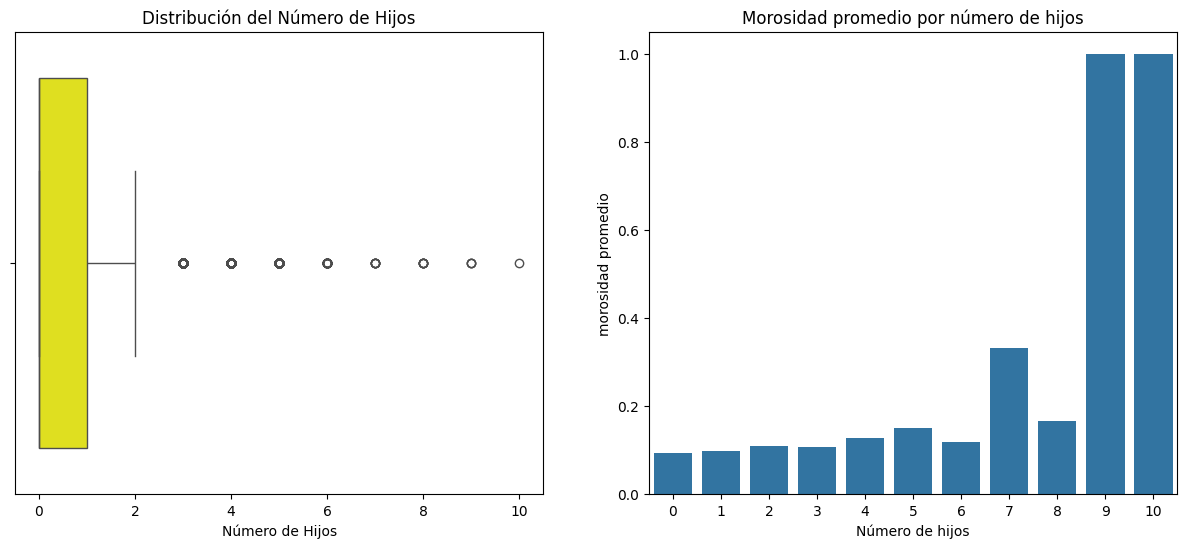

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Se hace el boxplot para visualizar los atipicos y la distribucion, vemos que existen atipicos pero son pocos, en pasos posteriores revisaremos si dejarlos o eliminarlos, ya que por el momento no son datos demasiado relevantes para el analisis
sns.boxplot( x='numero_hijos', data=df, color='yellow', ax=axs[0])
axs[0].set_title('Distribución del Número de Hijos')
axs[0].set_xlabel('Número de Hijos')



morosidad_por_hijos = df.groupby('numero_hijos')['mora'].mean().reset_index(name='morosidad_promedio')
#Se decicdio poner el numero de hijos en 10 ya que las personas con mas de 10 hijos no presentan morosidad en cambio los de menos de 10 si la presentan como se ve en el segundo grafico
morosidad_por_hijos = morosidad_por_hijos[morosidad_por_hijos['numero_hijos']<=10]
sns.barplot(x=morosidad_por_hijos['numero_hijos'], y=morosidad_por_hijos['morosidad_promedio'],data=morosidad_por_hijos, ax=axs[1])
axs[1].set_title("Morosidad promedio por número de hijos")
axs[1].set_xlabel("Número de hijos")
axs[1].set_ylabel("morosidad promedio")

plt.show()

Como observamos esta columna tiene una varianza alta entre valores lo cual vimos en el describe, a lo cual vamos a revisar si existe uno o mas datos que estan generando este error, como vemos existe un dato bastante alto y es sumamente extraño ya que pese a tener un salario anual bastante alto su monto de credito no es ni un 1% de lo que gana anualmente y aun asi esta en mora, lo que voy a hacer no va a ser eliminarlo si no guardarlo en una variable a parte y seguir con el analisis ya que este dato afecta enormemente la distribucion de la variable y del dataset, lo mejor en estos casos es corroborar la información con el proveedor de los datos, en este caso no es posible a lo cual lo voy adejar así.

In [ ]:
ingreso_anual_extrano = df[df['ingreso_anual']==df['ingreso_anual'].max()]
df = df[df['ingreso_anual']!=df['ingreso_anual'].max()]
ingreso_anual_extrano

,mora,tipo_contrato,genero,tiene_vehiculo,tiene_propiedades,numero_hijos,ingreso_anual,monto_credito,tipo_ingreso,estado_civil,...,peticiones_buro_año,mes_bloqueo,año_solicitud,mes_solicitud,id_oficina,id_empleado,edad años,años_antiguedad_laboral,antiguedad_num_celular_meses,fecha_solicitud
index,,,,,,,,,,,,,,,,,,,,,
67697,1,personal loan,F,0,1,2,242515045.0,547587.0,salary,married,...,1,1,2017,1,110152,81,36,2,0,2017-01-01


In [ ]:
distribucion('ingreso_anual')
print(f"Ingreso anual promedio {df['ingreso_anual'].mean()}")

Los datos que siguen la distribución se encuentran entre 0 y 381070.0 y se consideran outliyers los valores mayores a 381070.0
Ingreso anual promedio 182336.53397930917


In [ ]:
#Para separar los atipicos de la distribucion "normal" lo que vamos a hacer es crear una distincion y analizarlos por separado.
q_1, q_99 = np.percentile(df["ingreso_anual"], [1, 99])
atipicos_ingresos = (df['ingreso_anual'] > q_99) | (df['ingreso_anual'] < q_1)

df['ingreso_alto'] = np.where(atipicos_ingresos, 'Y', 'N')

In [ ]:
n_atipicos = df[df['ingreso_alto'] == 'N']
y_atipicos = df[df['ingreso_alto'] == 'Y']

In [ ]:
#Correlación general del dataset sin filtrado
print(f"correlacion de ingresos anuales con el monto del credito {df['ingreso_anual'].corr(df['monto_credito'])}")

#para los valores no atípicos
print(f"correlacion de ingresos anuales normales con el monto del credito {n_atipicos['ingreso_anual'].corr(n_atipicos['monto_credito'])}")

#para valores atípicos
print(f"correlacion de ingresos anuales altos con el monto del credito {y_atipicos['ingreso_anual'].corr(y_atipicos['monto_credito'])}")

correlacion de ingresos anuales con el monto del credito 0.33162754424792973
correlacion de ingresos anuales normales con el monto del credito 0.34535292566895426
correlacion de ingresos anuales altos con el monto del credito 0.5193560746582708


En general, las personas con mora presentan ingresos anuales más altos que aquellas sin mora. Esto puede parecer contraintuitivo, pero podría indicar que no necesariamente un mayor ingreso garantiza el cumplimiento de las obligaciones de pago. Tal vez influyen otros factores como el nivel de endeudamiento, hábitos financieros o tipo de contrato laboral.Para llegar a una mejor perspectiva de este problema los voy a separar y visualizarlos a parte.

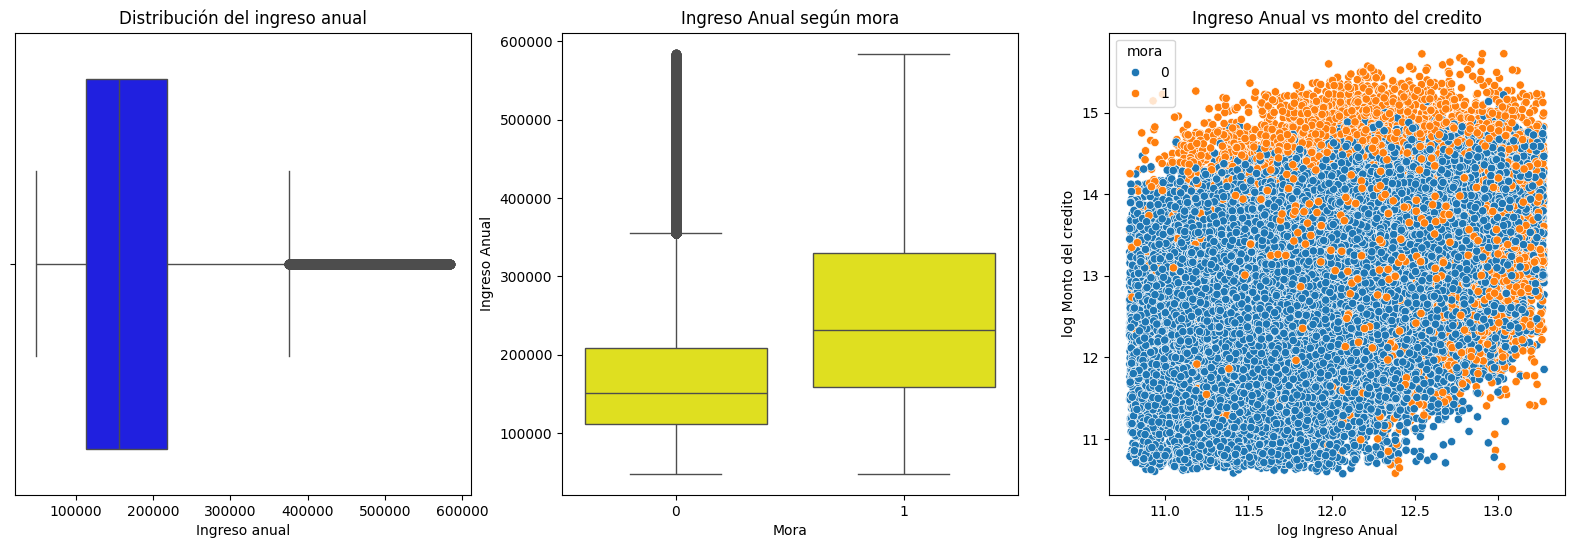

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

#Se hace el boxplot para visualizar los atipicos y la distribucion, vemos que existen atipicos.
sns.boxplot( x='ingreso_anual', data=n_atipicos, color='blue', ax=axs[0])
axs[0].set_title('Distribución del ingreso anual')
axs[0].set_xlabel('Ingreso anual')


sns.boxplot(data=n_atipicos, x='mora', y='ingreso_anual',color = 'yellow', ax=axs[1])
axs[1].set_title('Ingreso Anual según mora')
axs[1].set_xlabel('Mora')
axs[1].set_ylabel('Ingreso Anual')



sns.scatterplot(x=np.log(n_atipicos['ingreso_anual']), y=np.log(n_atipicos['monto_credito']), ax=axs[2], hue=n_atipicos['mora'])
axs[2].set_title('Ingreso Anual vs monto del credito')
axs[2].set_xlabel('log Ingreso Anual')
axs[2].set_ylabel('log Monto del credito')

plt.show()


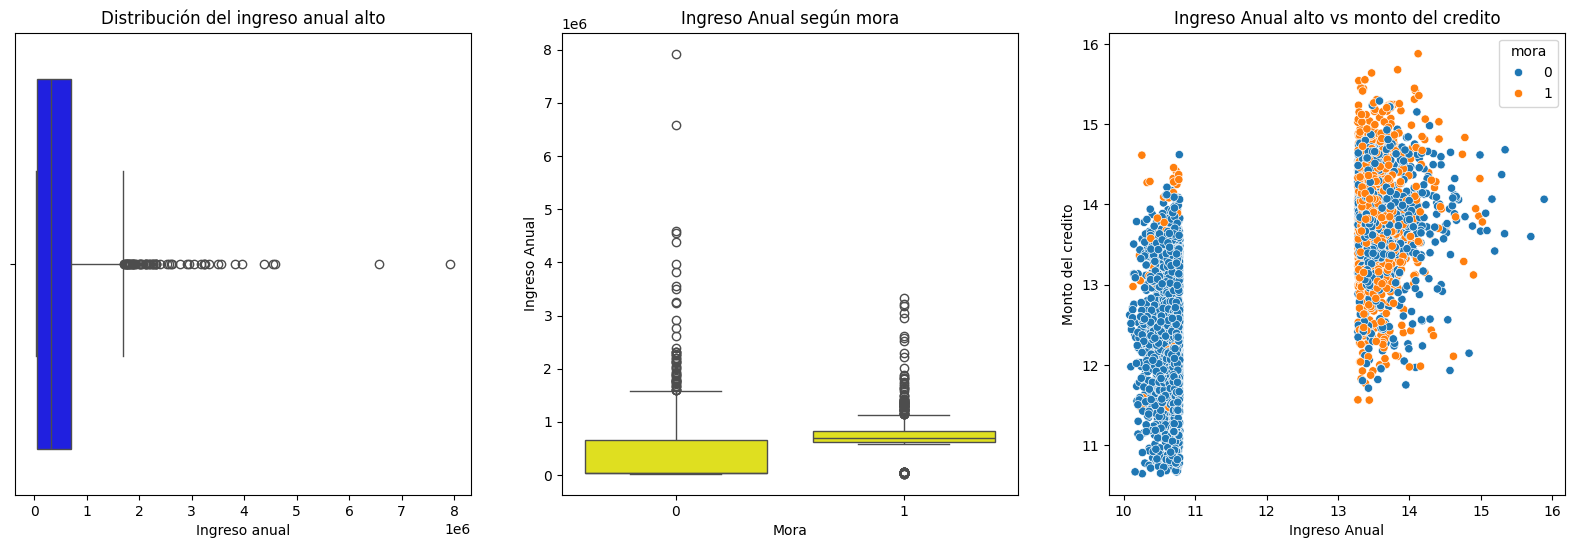

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

#Se hace el boxplot para visualizar los atipicos y la distribucion, vemos que existen atipicos
sns.boxplot( x='ingreso_anual', data=y_atipicos, color='blue', ax=axs[0])
axs[0].set_title('Distribución del ingreso anual alto')
axs[0].set_xlabel('Ingreso anual')


sns.boxplot(data=y_atipicos, x='mora', y='ingreso_anual', ax=axs[1], color = 'yellow')
axs[1].set_title('Ingreso Anual según mora')
axs[1].set_xlabel('Mora')
axs[1].set_ylabel('Ingreso Anual')



sns.scatterplot(x=np.log(y_atipicos['ingreso_anual']), y=np.log(y_atipicos['monto_credito']), ax=axs[2], hue=y_atipicos['mora'])
axs[2].set_title('Ingreso Anual alto vs monto del credito')
axs[2].set_xlabel('Ingreso Anual')
axs[2].set_ylabel('Monto del credito')

plt.show()

In [ ]:
distribucion('monto_credito')
print(f"Monto del credito promedio {df['monto_credito'].mean()}")

Los datos que siguen la distribución se encuentran entre 0 y 1755853.0 y se consideran outliyers los valores mayores a 1755853.0
Monto del credito promedio 653656.799951512


Al observar la distribución del monto de crédito por estado de mora, se evidencia que los usuarios con mora tienden a tener créditos de mayor valor en comparación con quienes no presentan mora. Esto sugiere que, además del nivel de ingreso, el monto total del crédito adquirido podría estar influenciando la probabilidad de incurrir en mora. Es posible que montos más altos representen un mayor compromiso financiero, y por ende, un mayor riesgo de incumplimiento.

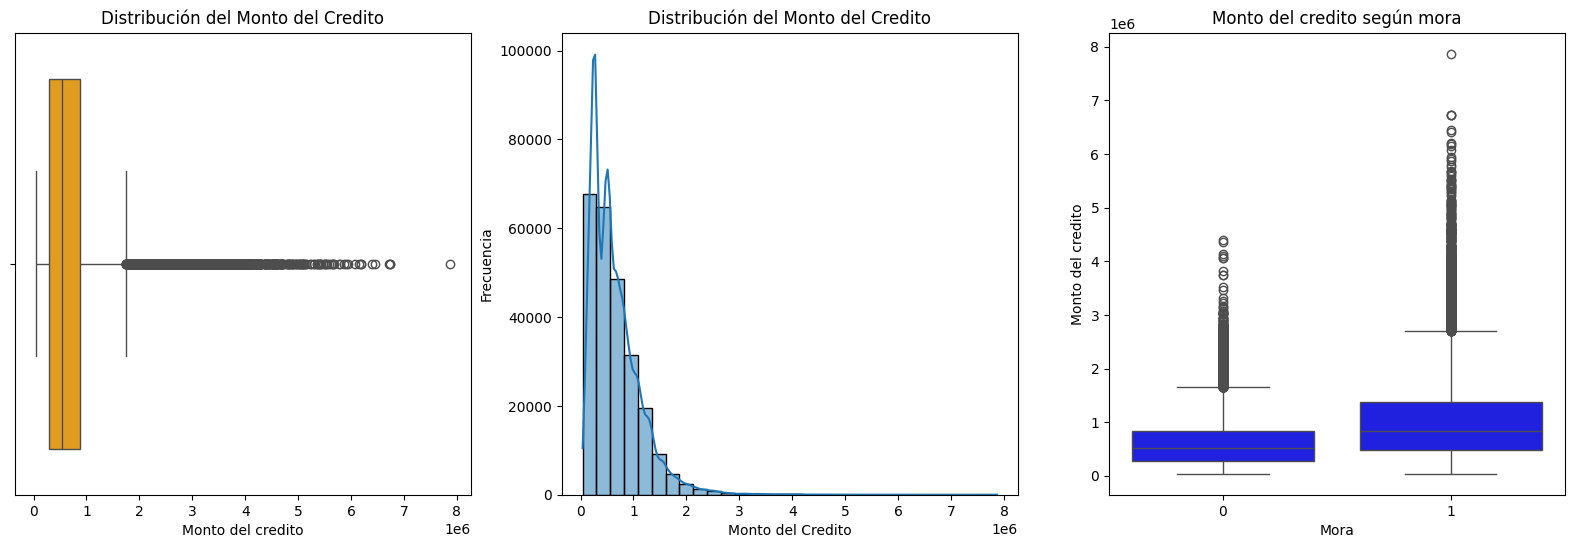

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

#Se hace el boxplot para visualizar los atipicos y la distribucion, vemos que existen atipicos.
sns.boxplot( x='monto_credito', data=df, color='orange', ax=axs[0])
axs[0].set_title('Distribución del Monto del Credito')
axs[0].set_xlabel('Monto del credito')

sns.histplot(df['monto_credito'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribución del Monto del Credito')
axs[1].set_xlabel('Monto del Credito')
axs[1].set_ylabel('Frecuencia')

sns.boxplot(data=df, x='mora', y='monto_credito', ax=axs[2], color = 'blue')
axs[2].set_title('Monto del credito según mora')
axs[2].set_xlabel('Mora')
axs[2].set_ylabel('Monto del credito')
plt.show()

In [ ]:
num = df.drop(categoricas, axis=1)
num = num.drop(columns=['edad_dias','antiguedad_laboral_dias','antiguedad_num_celular_dias', 'fecha_solicitud', 'ingreso_alto',
    'puntaje_externo_1',
    'puntaje_externo_2',])

In [ ]:
corr_con = df[[col for col in num.columns if col in df.columns]]

Como suponiamos desde el principio esta variable contiene una gran cantidad de valores atípicos a lo cual se puede considerar descartada parcialmente para un analisis de predicción, lo mejor sería informarlo a la empresa que existe un problema con la tabulación de datos

Los datos que siguen la distribución se encuentran entre 0 y 35.5 y se consideran outliyers los valores mayores a 35.5
promedio de numero Años de antiguedad 183.96599883152032


<Axes: xlabel='años_antiguedad_laboral'>

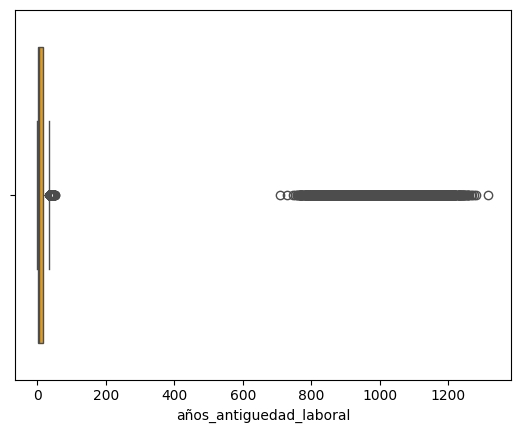

In [ ]:
distribucion('años_antiguedad_laboral')
print(f"promedio de numero Años de antiguedad {df['años_antiguedad_laboral'].mean()}")

#Se hace el boxplot para visualizar los atipicos y la distribucion, vemos que existen atipicos.
sns.boxplot( x='años_antiguedad_laboral', data=df, color='orange')

In [ ]:
df_atipicos_ant_lab = df[df['años_antiguedad_laboral'] > 35.5]
print(f"Existe una cantidad de {len(df_atipicos_ant_lab)} datos atipicos con años de antiguedad laboral mayor a 35.5")
print(f"La edad promedio de las personas que presentan atipicos son {df_atipicos_ant_lab['edad años'].mean()} a lo cual demuestra que hay una inconsistencia")

Existe una cantidad de 45728 datos atipicos con años de antiguedad laboral mayor a 35.5
La edad promedio de las personas que presentan atipicos son 59.787373163051086 a lo cual demuestra que hay una inconsistencia


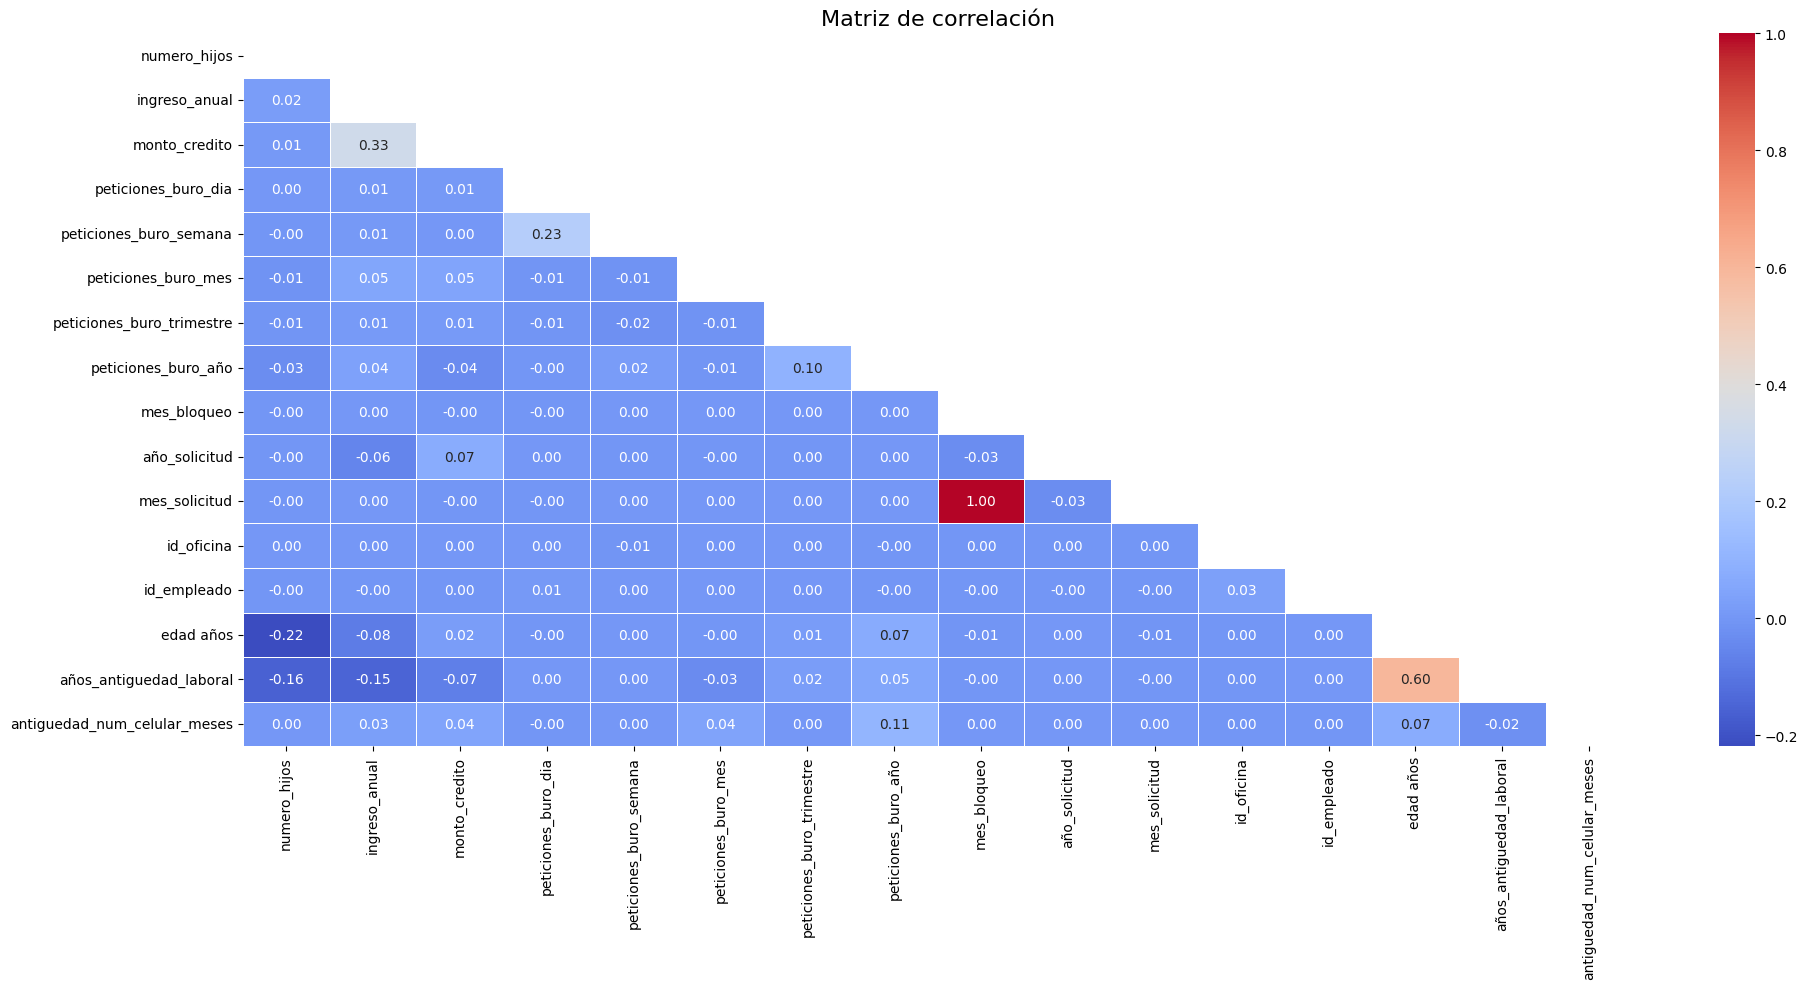

In [ ]:
corr = corr_con.corr().round(3)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crear el heatmap sin la mitad superior
plt.figure(figsize=(20, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación', fontsize=16)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlación entre 'numero_hijos' y 'edad años': -0.219


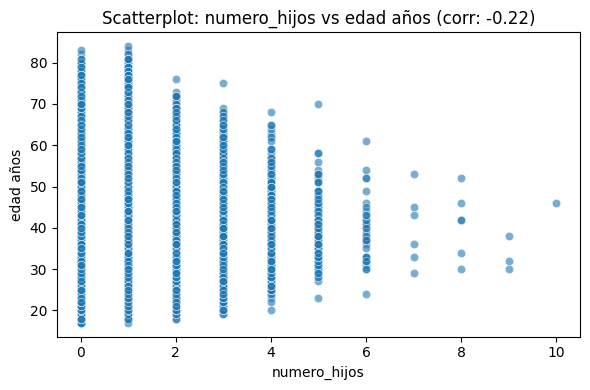

Correlación entre 'numero_hijos' y 'años_antiguedad_laboral': -0.159


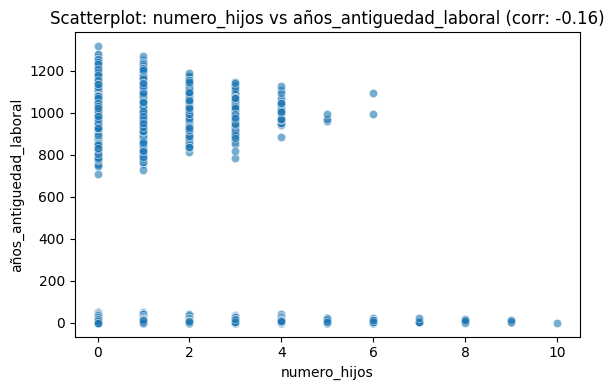

Correlación entre 'ingreso_anual' y 'monto_credito': 0.332


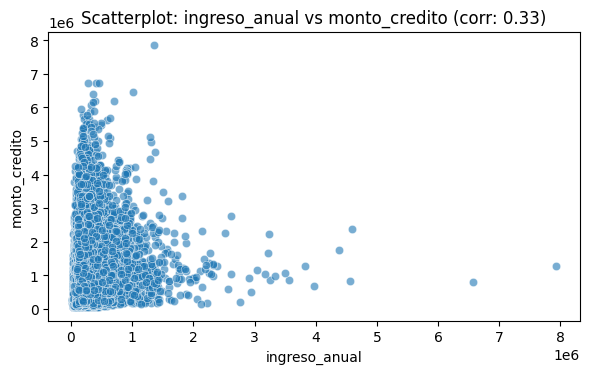

Correlación entre 'ingreso_anual' y 'años_antiguedad_laboral': -0.149


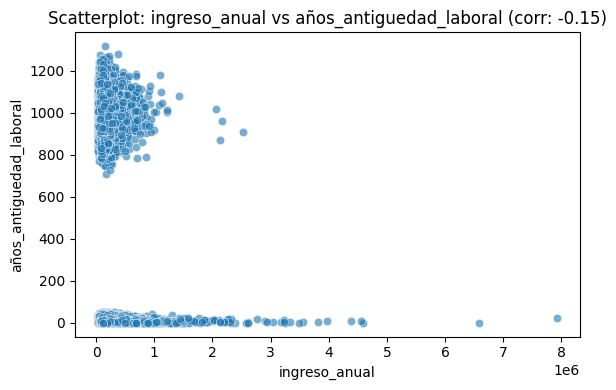

Correlación entre 'monto_credito' y 'ingreso_anual': 0.332


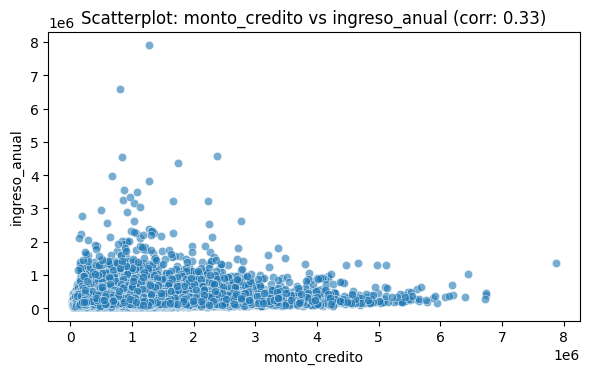

Correlación entre 'peticiones_buro_dia' y 'peticiones_buro_semana': 0.228


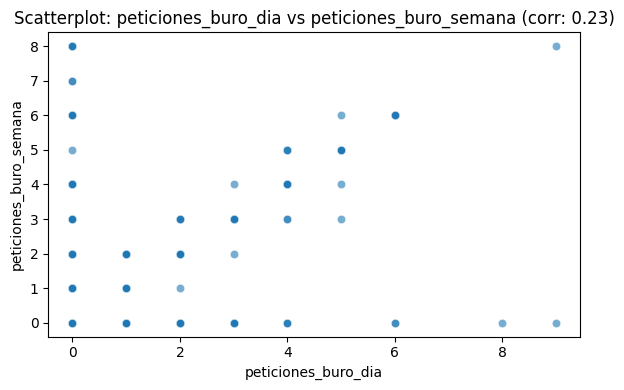

Correlación entre 'peticiones_buro_semana' y 'peticiones_buro_dia': 0.228


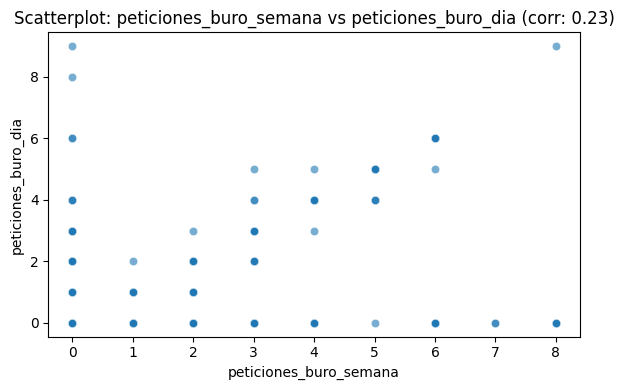

Correlación entre 'peticiones_buro_año' y 'antiguedad_num_celular_meses': 0.109


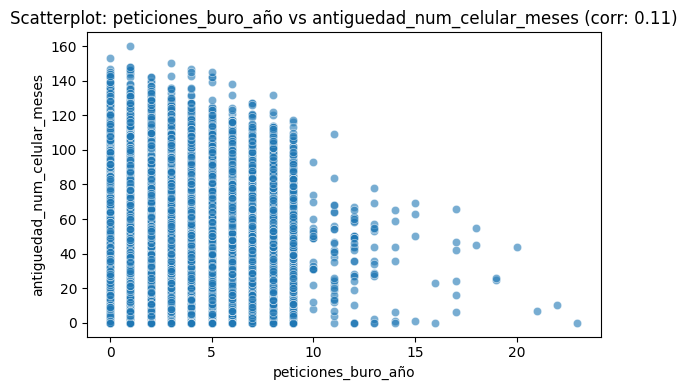

Correlación entre 'mes_bloqueo' y 'mes_solicitud': 1.000


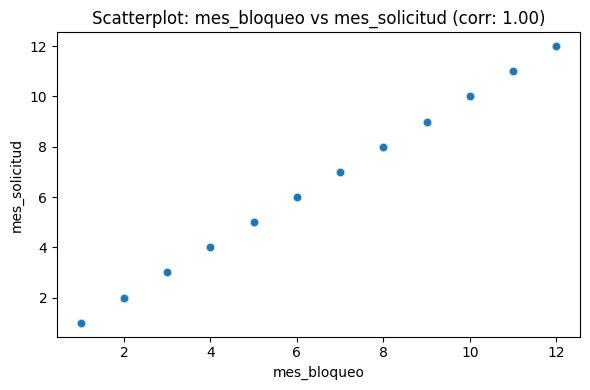

Correlación entre 'mes_solicitud' y 'mes_bloqueo': 1.000


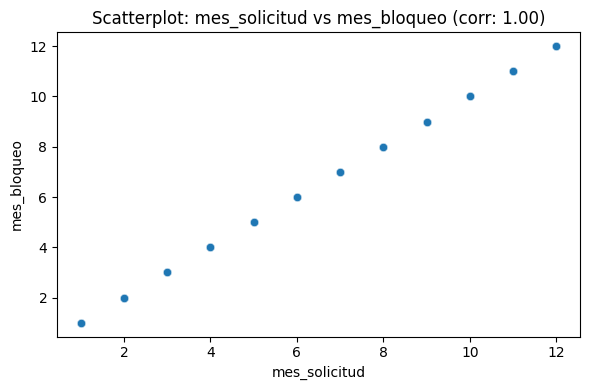

Correlación entre 'edad años' y 'numero_hijos': -0.219


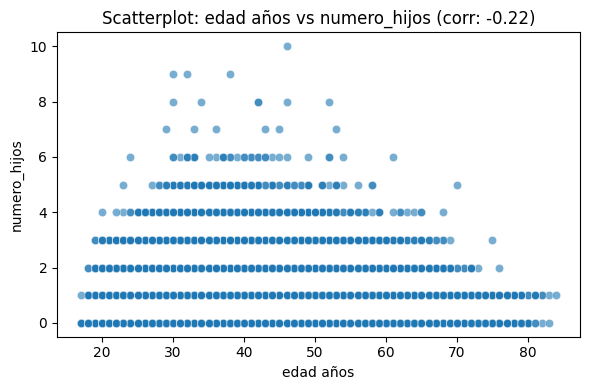

Correlación entre 'edad años' y 'años_antiguedad_laboral': 0.599


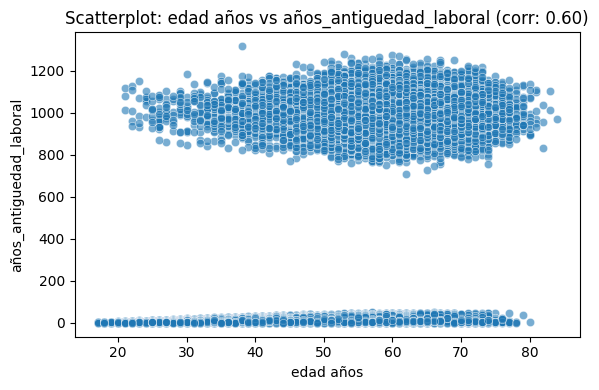

Correlación entre 'años_antiguedad_laboral' y 'numero_hijos': -0.159


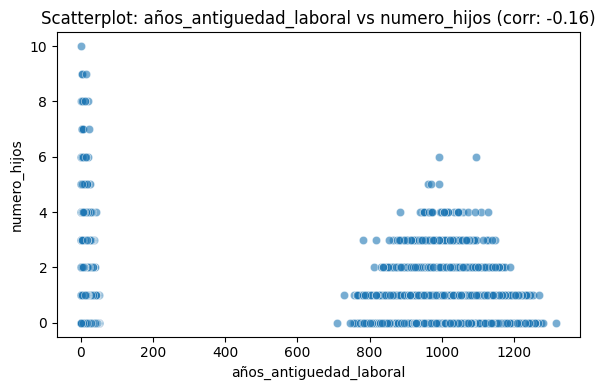

Correlación entre 'años_antiguedad_laboral' y 'ingreso_anual': -0.149


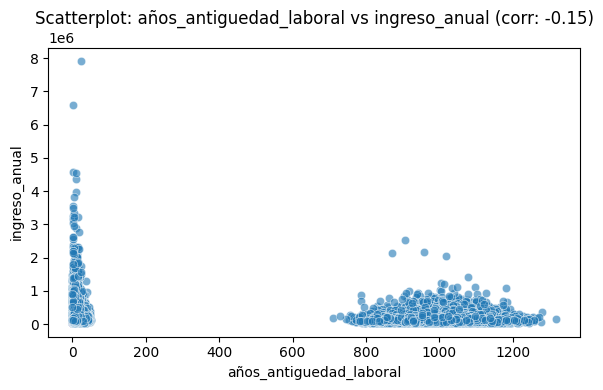

Correlación entre 'años_antiguedad_laboral' y 'edad años': 0.599


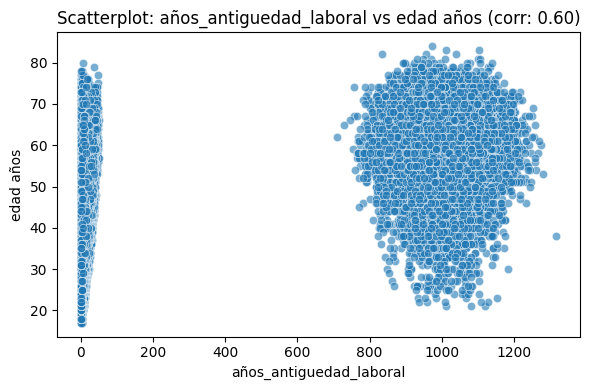

Correlación entre 'antiguedad_num_celular_meses' y 'peticiones_buro_año': 0.109


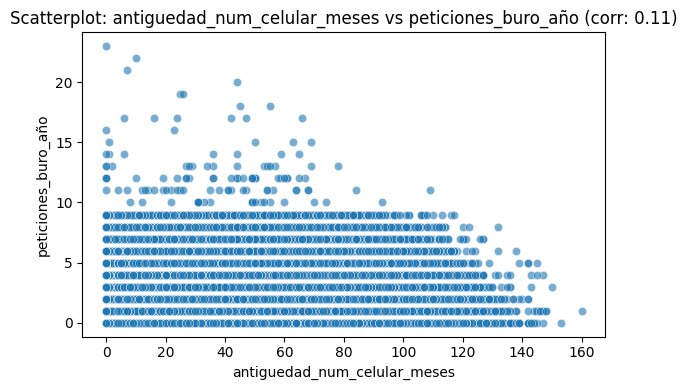

In [ ]:
# Calcular la matriz de correlación
corr_matrix = num.corr()

# Recorrer todas las combinaciones de columnas
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            corr_value = corr_matrix.loc[col1, col2]
            if abs(corr_value) > 0.1:
                print(f"Correlación entre '{col1}' y '{col2}': {corr_value:.3f}")

                # Gráfico de dispersión para ese par
                plt.figure(figsize=(6, 4))
                sns.scatterplot(data=num, x=col1, y=col2, alpha=0.6)
                plt.title(f"Scatterplot: {col1} vs {col2} (corr: {corr_value:.2f})")
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.tight_layout()
                plt.show()

Se plantea que la variable objetivo mora (default) presenta patrones sistemáticos asociados a variables financieras (ingreso_anual, monto_credito) y métricas de riesgo externo (puntaje_externo_1, puntaje_externo_2). Esta relación podría revelar criterios ocultos en la concesión de créditos y factores predictivos de morosidad."

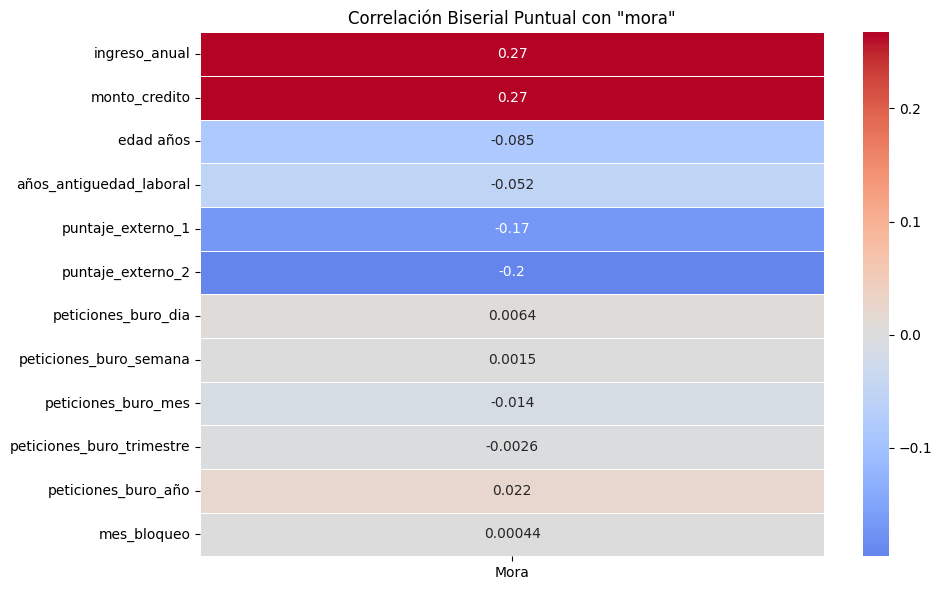

In [ ]:
variables_numericas = [
    'ingreso_anual',
    'monto_credito',
    'edad años',
    'años_antiguedad_laboral',
    'puntaje_externo_1',
    'puntaje_externo_2',
    'peticiones_buro_dia',
    'peticiones_buro_semana',
    'peticiones_buro_mes',
    'peticiones_buro_trimestre',
    'peticiones_buro_año',
    'mes_bloqueo'
]


resultados = {}

for var in variables_numericas:
    coef, p_valor = pointbiserialr(df['mora'], df[var])
    resultados[var] = coef


df_corr = pd.DataFrame(resultados, index=['Mora']).T


plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlación Biserial Puntual con "mora"')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Correlación biserial puntual entre variables numéricas y `mora`

| Variable             | Correlación con mora | Dirección | Magnitud (Cohen, 1988)       |
|----------------------|----------------------|-----------|------------------------------|
| ingreso_anual        | 0.27                 | Positiva  | Efecto pequeño-mediano       |
| monto_credito        | 0.27                 | Positiva  | Efecto pequeño-mediano       |
| puntaje_externo_1    | -0.17                | Negativa  | Efecto pequeño               |
| puntaje_externo_2    | -0.20                | Negativa  | Efecto pequeño               |



**Relación riesgo-ingresos:**
La correlación positiva
r=0.27 entre mora e ingreso_anual sugiere una paradoja: clientes con mayores ingresos tienen mayor probabilidad de incumplimiento.

**Posibles explicaciones:**

Sesgo de aprobación: Créditos más grandes otorgados a altos ingresos sin verificar estabilidad laboral u otros factores.

**Monto del crédito como factor de riesgo:**

 La correlación r=0.27 indica que por cada aumento de monto_credito, la probabilidad de mora aumenta.

**Puntajes externos:**

Las correlaciones negativas confirman su rol como indicadores de riesgo inverso, aunque su poder predictivo es limitado y bajo

Text(0.5, 1.0, 'Distribución de Ingresos por Estado de Mora')

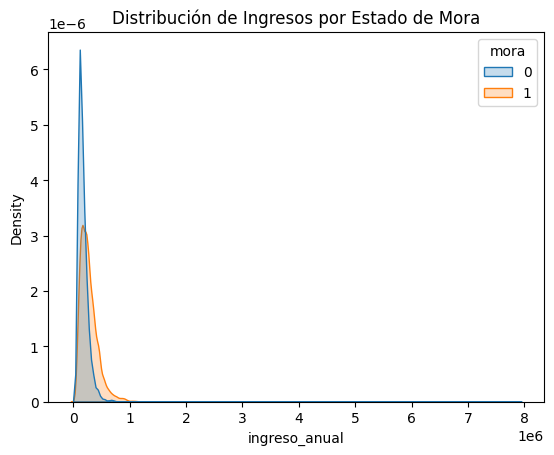

In [ ]:
sns.kdeplot(data=df, x='ingreso_anual', hue='mora', fill=True, common_norm=False)
plt.title("Distribución de Ingresos por Estado de Mora")

<Figure size 1400x600 with 0 Axes>

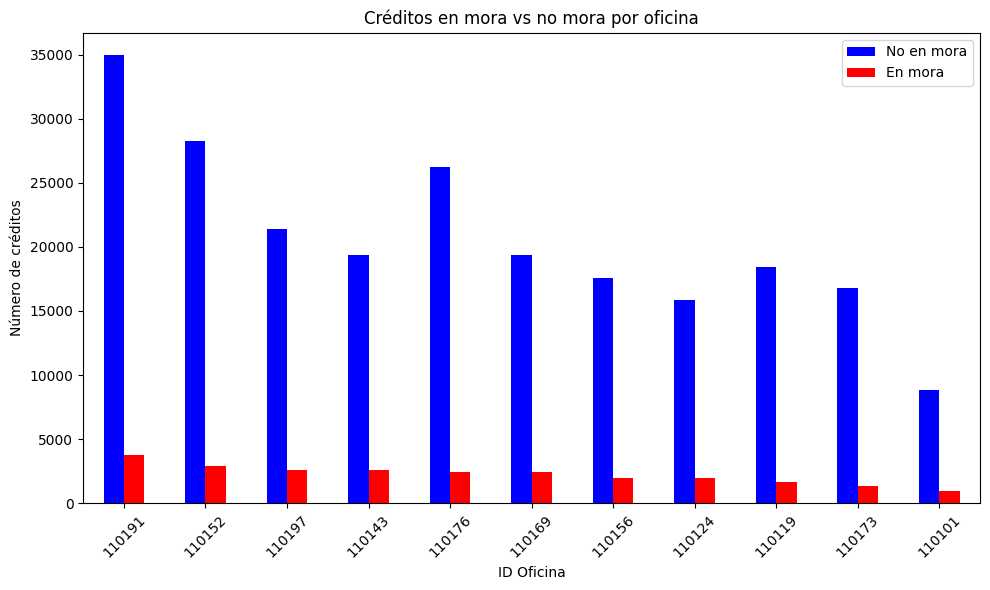

In [ ]:
plt.figure(figsize=(14, 6))
conteo = df.groupby(['id_oficina', 'mora']).size().unstack(fill_value=0).sort_values(1, ascending=False)

conteo.plot(kind='bar',
            color={0: 'blue', 1: 'red'},
            figsize=(10, 6))

plt.title('Créditos en mora vs no mora por oficina')
plt.xlabel('ID Oficina')
plt.ylabel('Número de créditos')
plt.legend(['No en mora', 'En mora'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
conteo = df.groupby(['id_oficina', 'mora']).size().unstack(fill_value=0).reset_index()
conteo = conteo.rename_axis('index', axis=0)
conteo['total'] = conteo[0] + conteo[1]
conteo['porcentaje_mora'] = (conteo[1] / conteo['total'] * 100).round(2)
conteo['porcentaje_no_mora'] = (conteo[0] / conteo['total'] * 100).round(2)
monto_promedio = df.groupby('id_oficina')['monto_credito'].agg(['mean','sum']).round(0).reset_index()
monto_promedio.columns = ['id_oficina', 'monto_promedio', 'monto_total']
conteo = pd.merge(conteo, monto_promedio, on='id_oficina')
conteo.sort_values(['total'], ascending=False)

,id_oficina,0,1,total,porcentaje_mora,porcentaje_no_mora,monto_promedio,monto_total
9,110191,34944,3760,38704,9.71,90.29,653181.0,2.528072e+10
4,110152,28224,2920,31144,9.38,90.62,648688.0,2.020274e+10
8,110176,26250,2445,28695,8.52,91.48,647516.0,1.858047e+10
10,110197,21365,2611,23976,10.89,89.11,663468.0,1.590731e+10
3,110143,19343,2580,21923,11.77,88.23,657009.0,1.440362e+10
6,110169,19348,2418,21766,11.11,88.89,661903.0,1.440698e+10
1,110119,18424,1660,20084,8.27,91.73,651051.0,1.307571e+10
5,110156,17558,1959,19517,10.04,89.96,654863.0,1.278095e+10
7,110173,16824,1361,18185,7.48,92.52,643859.0,1.170857e+10
2,110124,15869,1957,17826,10.98,89.02,660544.0,1.177486e+10


In [ ]:
mora_promedio = conteo['porcentaje_mora'].mean()
print(f"%mora promedio por oficina es de {mora_promedio} \n Oficinas con %mora mayor al promedio")
conteo[conteo['porcentaje_mora']>mora_promedio].sort_values('porcentaje_mora', ascending=False)

%mora promedio por oficina es de 9.800909090909089 
 Oficinas con %mora mayor al promedio


,id_oficina,0,1,total,porcentaje_mora,porcentaje_no_mora,monto_promedio,monto_total
3,110143,19343,2580,21923,11.77,88.23,657009.0,1.440362e+10
6,110169,19348,2418,21766,11.11,88.89,661903.0,1.440698e+10
2,110124,15869,1957,17826,10.98,89.02,660544.0,1.177486e+10
10,110197,21365,2611,23976,10.89,89.11,663468.0,1.590731e+10
5,110156,17558,1959,19517,10.04,89.96,654863.0,1.278095e+10


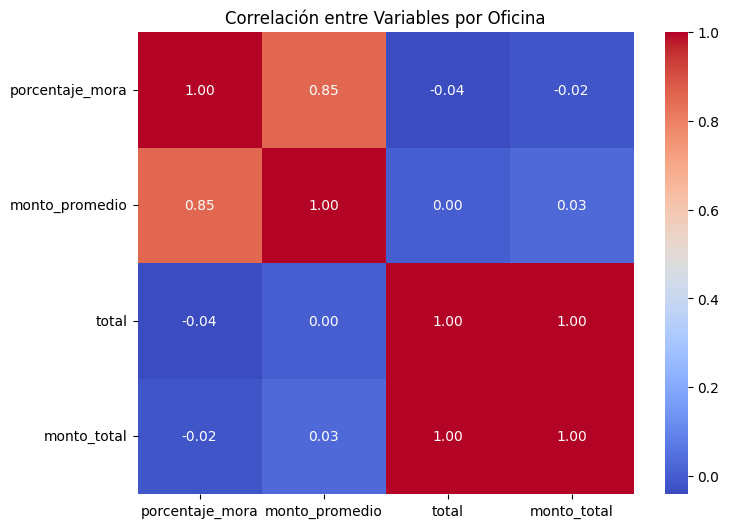

In [ ]:
corr = conteo[['porcentaje_mora', 'monto_promedio', 'total', 'monto_total']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables por Oficina')
plt.show()

El gráfico muestra la relación entre el porcentaje de mora y el monto total por oficina. Se observa que algunas oficinas, como la 110191, 110176 y 110173, manejan altos volúmenes de crédito con bajos niveles de mora, lo que sugiere una gestión eficiente del riesgo crediticio. En contraste, casos como el de la oficina 110101 evidencian lo contrario: a pesar de tener un monto total bajo, presenta un porcentaje de mora cercano al 10%, lo cual es desfavorable si se compara con oficinas como la 110173, que manejan montos más altos con tasas de mora considerablemente menores. Otro caso preocupante es el de las oficinas 110124 y 110143, cuyos montos totales son similares a los de oficinas como la 110176 y la 110119, pero presentan porcentajes de mora significativamente más altos, alcanzando casi el 12%, lo que podría indicar deficiencias en sus procesos de evaluación y seguimiento crediticio.`

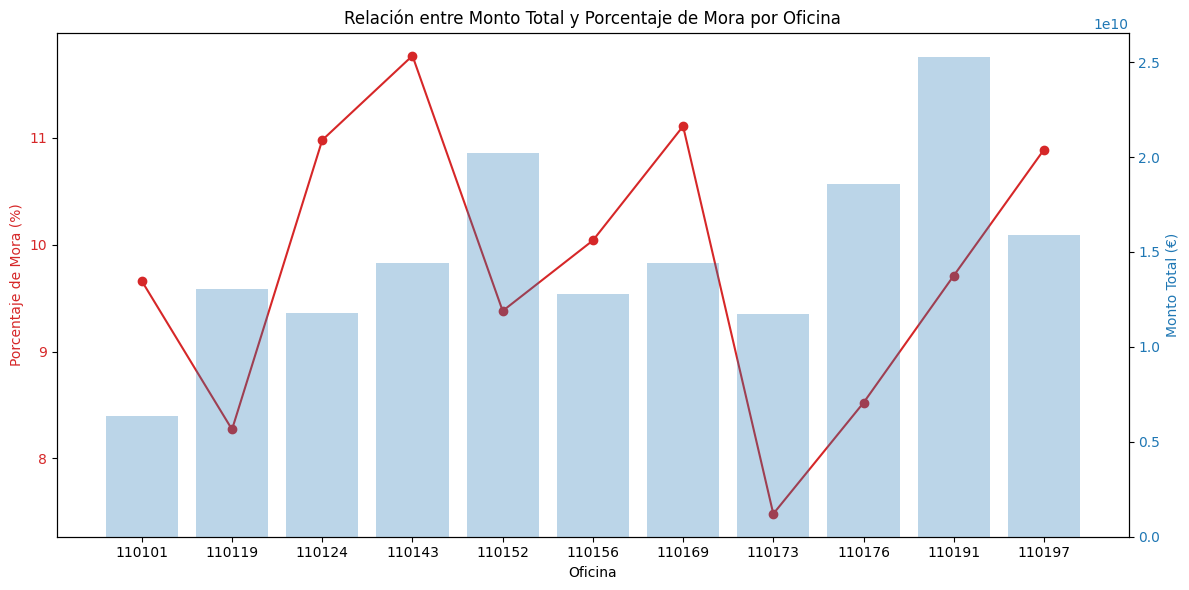

In [ ]:
x = np.arange(len(conteo['id_oficina']))
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Oficina')
ax1.set_ylabel('Porcentaje de Mora (%)', color=color)
ax1.plot(x, conteo['porcentaje_mora'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Monto Total (€)', color=color)
ax2.bar(x, conteo['monto_total'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)


plt.xticks(ticks=x, labels=conteo['id_oficina'], rotation=90)
plt.title('Relación entre Monto Total y Porcentaje de Mora por Oficina')
plt.tight_layout()
plt.show()

In [ ]:
print(f"Existen {len(df['id_empleado'].unique())} empleados distintos")
empl = df.groupby(['id_empleado', 'mora']).size().unstack(fill_value=0).reset_index()
empl['porcentaje_mora'] = (empl[1] / (empl[0] + empl[1]) * 100).round(2)
empl['total'] = empl[0] + empl[1]
empl = empl.rename_axis('index', axis=0)
monto_promedio_empl = df.groupby('id_empleado')['monto_credito'].agg(['mean','sum']).round(0).reset_index()
monto_promedio_empl.columns = ['id_empleado', 'monto_promedio', 'monto_total']
empl_com = pd.merge(empl, monto_promedio_empl, on='id_empleado').sort_values(['total', 'porcentaje_mora'], ascending=[False, False])
empl_com

Existen 32 empleados distintos


,id_empleado,0,1,porcentaje_mora,total,monto_promedio,monto_total
29,86,28408,3088,9.80,31496,653906.0,2.059541e+10
23,72,23158,2421,9.46,25579,648967.0,1.659993e+10
21,67,14375,1779,11.01,16154,661631.0,1.068798e+10
9,31,14158,1720,10.83,15878,660879.0,1.049343e+10
14,38,13465,1814,11.87,15279,655473.0,1.001497e+10
24,76,13797,1266,8.40,15063,648393.0,9.766744e+09
8,29,13923,1106,7.36,15029,642395.0,9.654561e+09
25,78,11201,1397,11.09,12598,664959.0,8.377149e+09
30,87,10510,974,8.48,11484,651487.0,7.481676e+09
28,83,10065,965,8.75,11030,645454.0,7.119355e+09


In [ ]:
empl_mora_promedio = empl_com['porcentaje_mora'].mean()
print(f"%mora promedio de los empleados es de {empl_mora_promedio}")
empl_com[empl_com['porcentaje_mora']>empl_mora_promedio]

%mora promedio de los empleados es de 9.9025


,id_empleado,0,1,porcentaje_mora,total,monto_promedio,monto_total
21,67,14375,1779,11.01,16154,661631.0,1.068798e+10
9,31,14158,1720,10.83,15878,660879.0,1.049343e+10
14,38,13465,1814,11.87,15279,655473.0,1.001497e+10
25,78,11201,1397,11.09,12598,664959.0,8.377149e+09
3,14,8609,957,10.00,9566,652929.0,6.245918e+09
6,18,7071,795,10.11,7866,657767.0,5.173995e+09
0,10,6830,860,11.18,7690,656173.0,5.045972e+09
11,35,5699,751,11.64,6450,660004.0,4.257026e+09
19,56,3754,440,10.49,4194,666574.0,2.795613e+09
12,36,3453,451,11.55,3904,670661.0,2.618261e+09


Cada oficina tiene 3 empleados (excepto 110191). Sin embargo se observan brechas enormes en cuanto a la
 cantidad de créditos gestionados por cada uno de los empleados. Esto muestra enormes diferencias de
 rendimiento en gestores de crédito que puede ser un problema pues se esperaría que todos los gestores sean
 buenos y tenga un rendimiento similar.
 Por lo tanto en la selección y permanencia de los vendedores pueden estar existiendo problemas que pueden
 explicar los inconvenientes financieros en los que se encuentra TuCreditoCo.

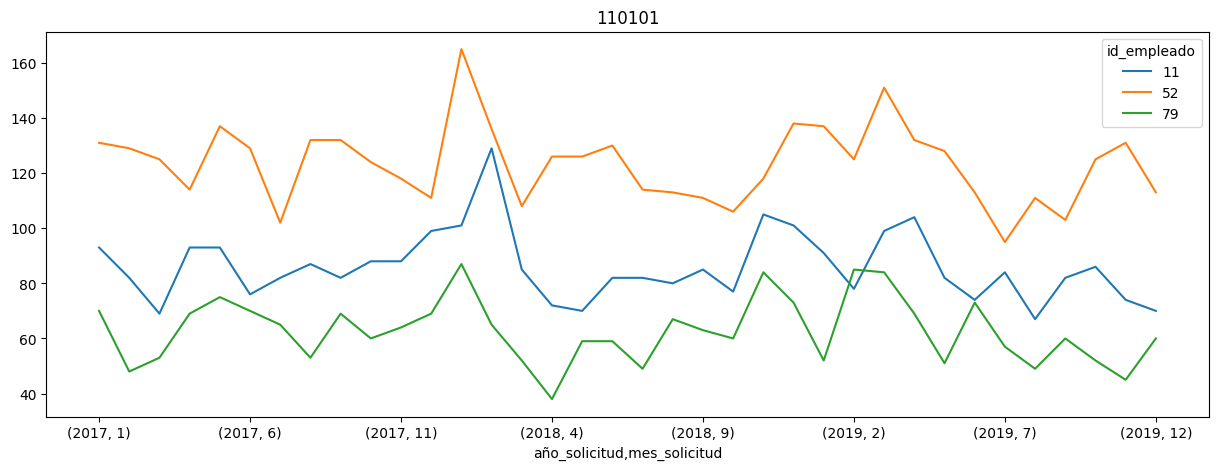

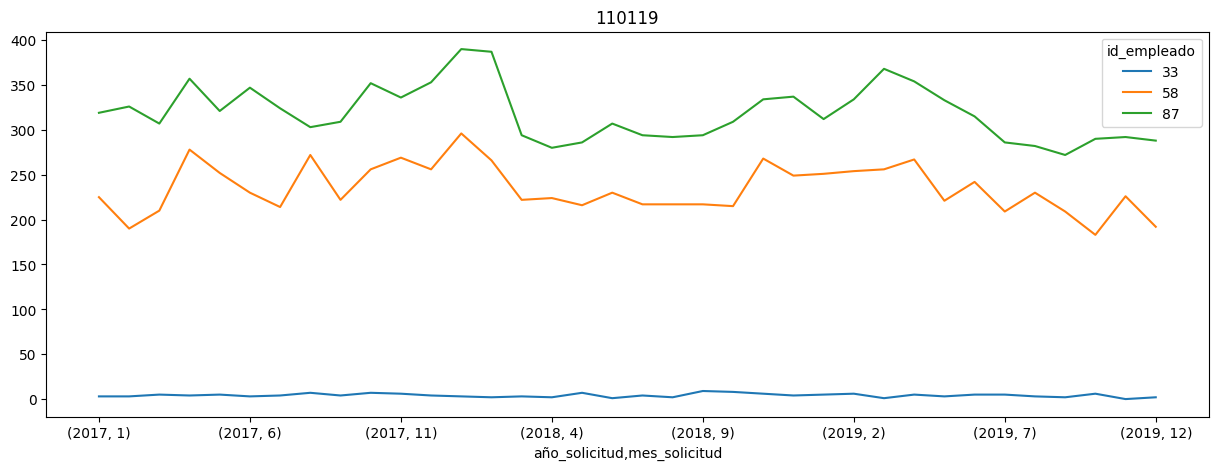

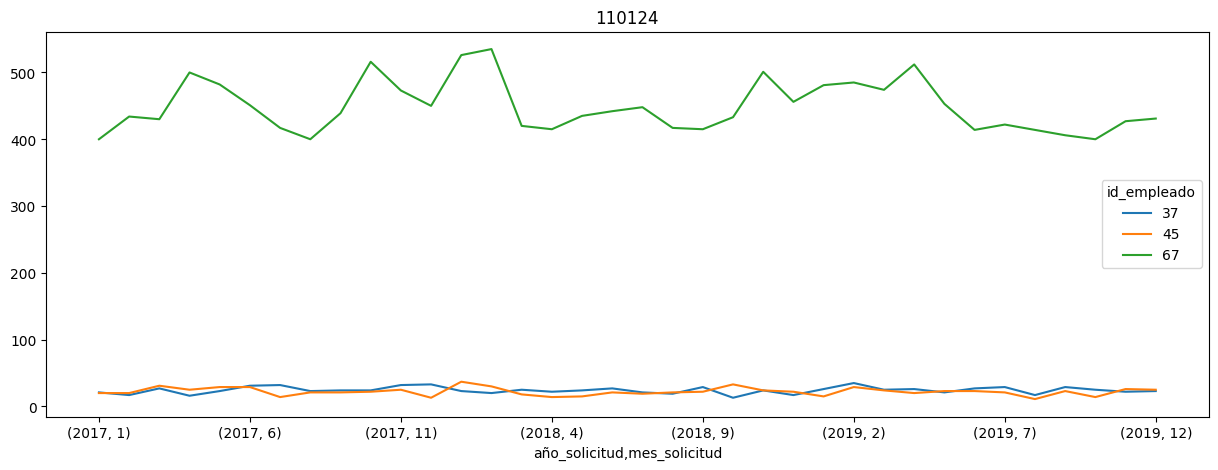

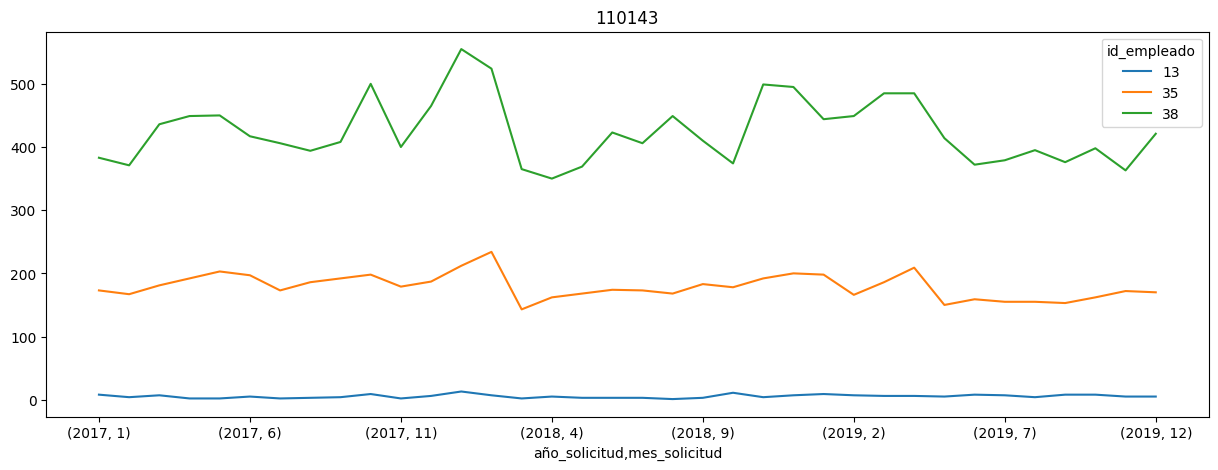

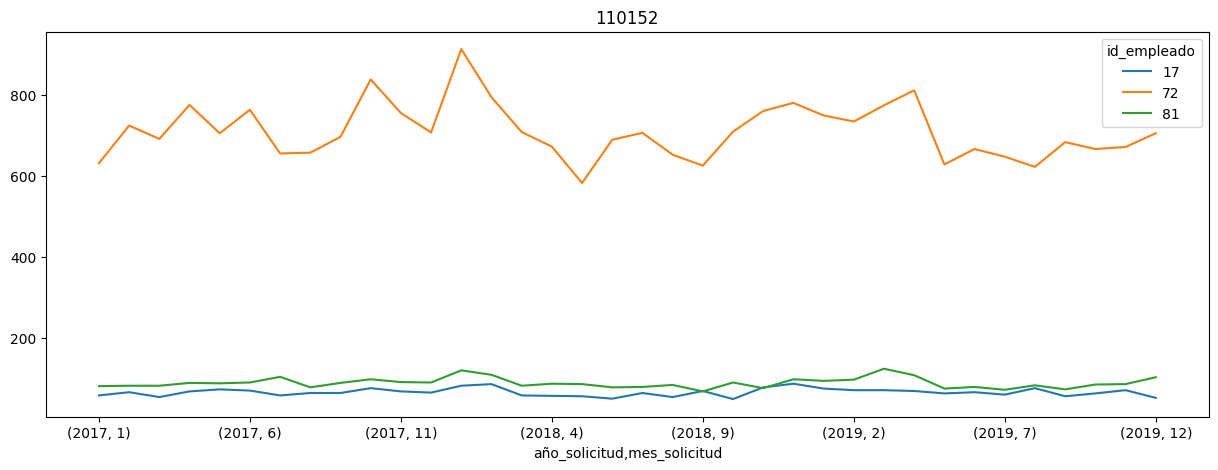

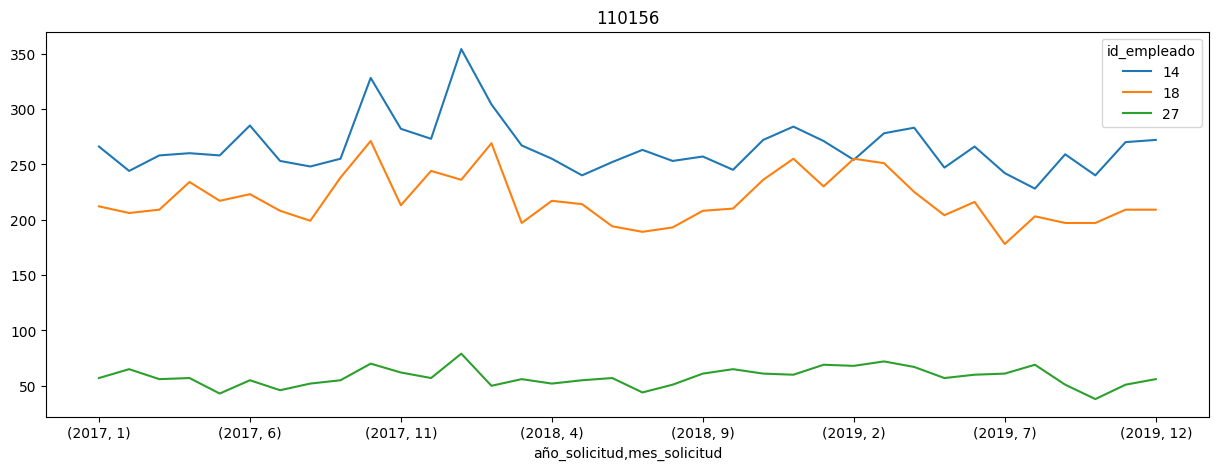

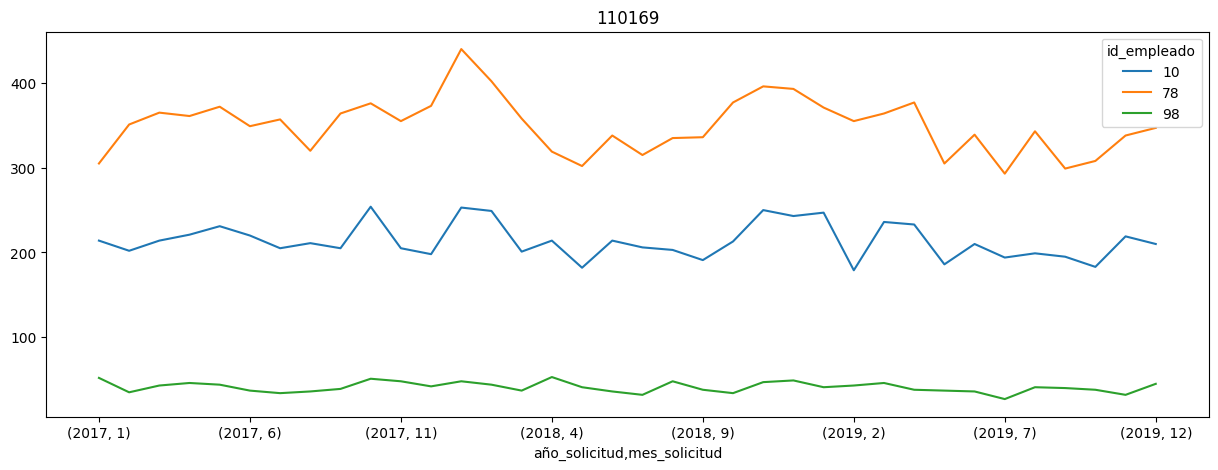

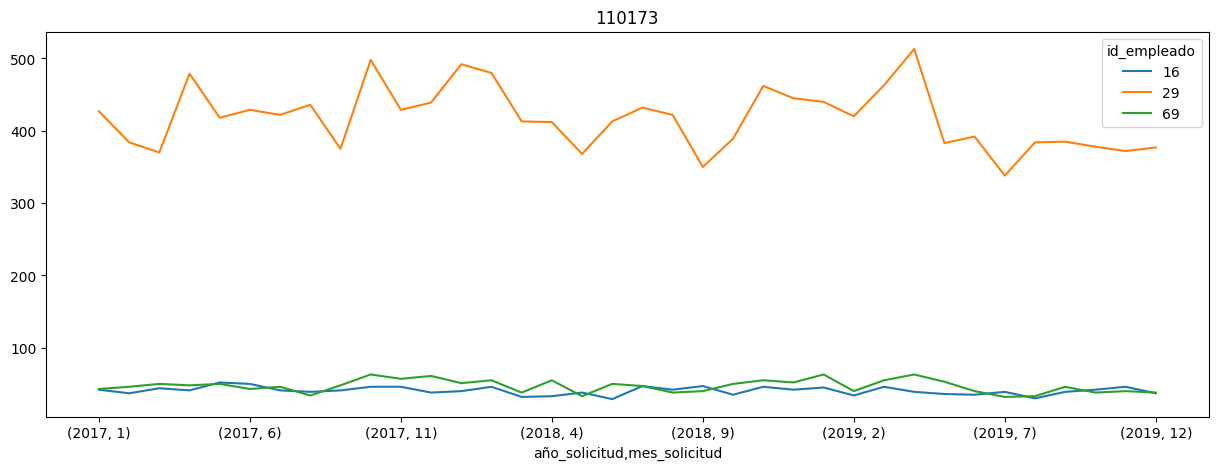

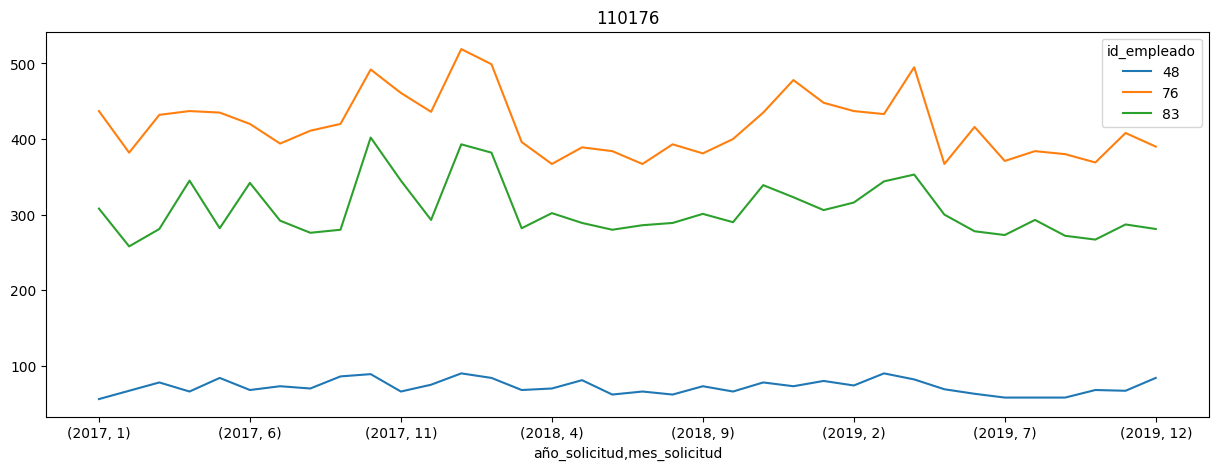

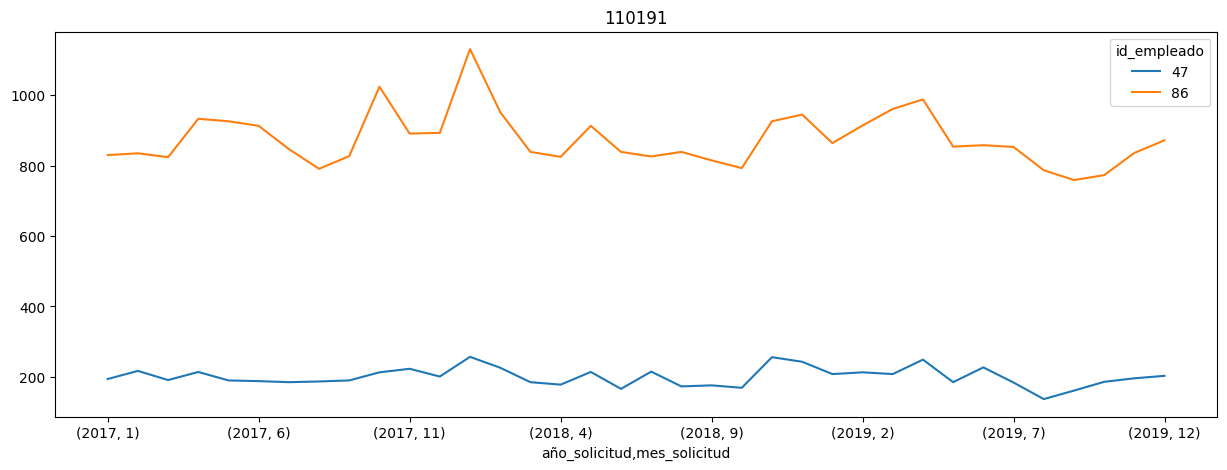

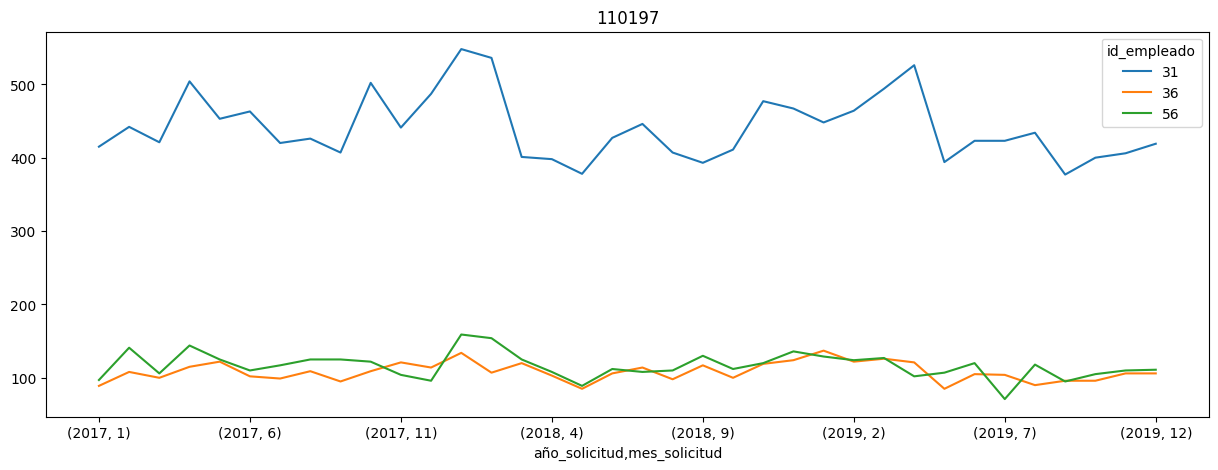

In [ ]:
cred_por_empleado = pd.pivot_table(df, index=['id_oficina','id_empleado'], columns=['año_solicitud', 'mes_solicitud'], values='monto_credito', aggfunc='count', fill_value=0).reset_index()  # Tabla pivote con la información oficina y empleado a nivel de filas y de año y mes a nivel de columnas
# Loop para hacer un gráfico por cada oficina
for office in cred_por_empleado['id_oficina', ''].unique():
    df_filtrado = cred_por_empleado[cred_por_empleado['id_oficina', ''] == office].drop('id_oficina', axis=1).set_index('id_empleado').T # Data frame filtrado, sin la columna oficina y transpuesto
    df_filtrado.plot(figsize=(15,5), title=office) # Gráfico de lineas

In [ ]:
creditos_en_mora = df['mora'].sum()
total_creditos = len(df)
tasa_morosidad = (creditos_en_mora / total_creditos) * 100
print(f"Tasa de morosidad general: {tasa_morosidad:.2f}%")

Tasa de morosidad general: 9.78%


En genera y para recalcar algo teniendo en cuenta que una de las problematicas de la empresa es la tasa de impagos, observamos que la tasa de mora promedio es de 9.78% lo cual es bastante alto ya que segun varios articulos "En la mayoría de industrias si tienes buenas prácticas comerciales esta tasa debería rondar por el 5-6%, esto es un aproximado de lo que es tener una tasa de morosidad sana, es importante monitorear constantemente este indicador, para anticiparse a posibles problemas financieros". Un índice de morosidad alto puede ser una señal de alerta de posibles problemas de liquidez y riesgo de incobrables. a lo cual lo mejor es Mantener este índice bajo esto es crucial para una gestión financiera saludable y para evitar pérdidas por deudas incobrables, además nos demuestra que tenemos una cartera de clientes conveniente. esto segun fuentes[5 indicadores claves para la gestión de cobranzas](https://www.bemmbo.com/blog/indicadores-para-la-gestion-de-cobranza#:~:text=En%20la%20mayor%C3%ADa%20de%20industrias,anticiparse%20a%20posibles%20problemas%20financieros.)

Ademas de esto siguiendo recomendaciones buscaremos identificar a los clientes con un %mora bastante alto y en base a estos datos crear un modelo predictivo que nos ayude a predecir el comportamiento de estos clientes con mora alta para mejorar la gestion de proximos clientes con perfiles similares

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251609 entries, 0 to 251620
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   mora                          251609 non-null  int64         
 1   tipo_contrato                 251609 non-null  object        
 2   genero                        251609 non-null  object        
 3   tiene_vehiculo                251609 non-null  int64         
 4   tiene_propiedades             251609 non-null  int64         
 5   numero_hijos                  251609 non-null  int64         
 6   ingreso_anual                 251609 non-null  float64       
 7   monto_credito                 251609 non-null  float64       
 8   tipo_ingreso                  251609 non-null  object        
 9   estado_civil                  251609 non-null  object        
 10  edad_dias                     251609 non-null  int64         
 11  antiguedad_laboral

In [ ]:
df_pro = df.drop(columns= ['edad_dias', 'antiguedad_laboral_dias', 'años_antiguedad_laboral', 'antiguedad_num_celular_dias'])
df_pro.head()

,mora,tipo_contrato,genero,tiene_vehiculo,tiene_propiedades,numero_hijos,ingreso_anual,monto_credito,tipo_ingreso,estado_civil,...,peticiones_buro_año,mes_bloqueo,año_solicitud,mes_solicitud,id_oficina,id_empleado,edad años,antiguedad_num_celular_meses,fecha_solicitud,ingreso_alto
index,,,,,,,,,,,,,,,,,,,,,
0,1,personal loan,M,0,1,0,394338.0,1207961.0,shareholder,married,...,4,10,2017,10,110143,38,44,34,2017-10-01,N
1,1,personal loan,F,0,1,0,322796.0,409690.0,salary,single,...,1,4,2017,4,110143,38,23,42,2017-04-01,N
2,1,personal loan,M,0,1,1,241201.0,858450.0,salary,married,...,1,10,2017,10,110143,38,35,38,2017-10-01,N
3,1,personal loan,M,0,0,1,264255.0,114679.0,salary,single,...,1,2,2017,2,110143,35,25,28,2017-02-01,N
4,1,personal loan,F,0,1,1,166682.0,402669.0,salary,married,...,1,12,2017,12,110143,38,44,0,2017-12-01,N


Como podemos observar las columnas de peticiones buro dia, semana, mes y año, no nos brindan una gran cantidad de informacion y su correlacion con la variable objetivo mora es muy debil o no es lineal, a lo cual por el momento vamos a dejar estas visualizaciones para dar a reconocer la distribucion de estas columnas y pasaremos a el preprocesamiento de los datos

Media de peticiones por dia son 0.006994980306745784
Los datos que siguen la distribución se encuentran entre 0.0 y 0.0 y se consideran outliyers los valores mayores a 0.0
cantidad de datos atipicos 1404
Media de peticiones por semana son 0.03437078959814633
Los datos que siguen la distribución se encuentran entre 0.0 y 0.0 y se consideran outliyers los valores mayores a 0.0
cantidad de datos atipicos 8083
Media de peticiones por mes son 0.27507362614214914
Los datos que siguen la distribución se encuentran entre 0.0 y 0.0 y se consideran outliyers los valores mayores a 0.0
cantidad de datos atipicos 42037
Media de peticiones por trimestre son 0.2636153714692241
Los datos que siguen la distribución se encuentran entre 0.0 y 0.0 y se consideran outliyers los valores mayores a 0.0
cantidad de datos atipicos 47775
Media de peticiones por año son 1.8990218950832443
Los datos que siguen la distribución se encuentran entre 0 y 7.5 y se consideran outliyers los valores mayores a 7.5
cantidad 

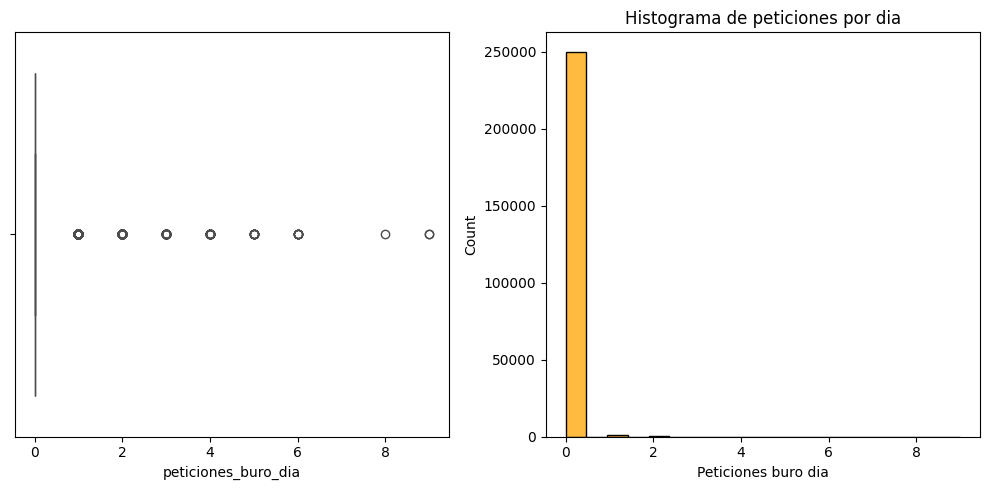

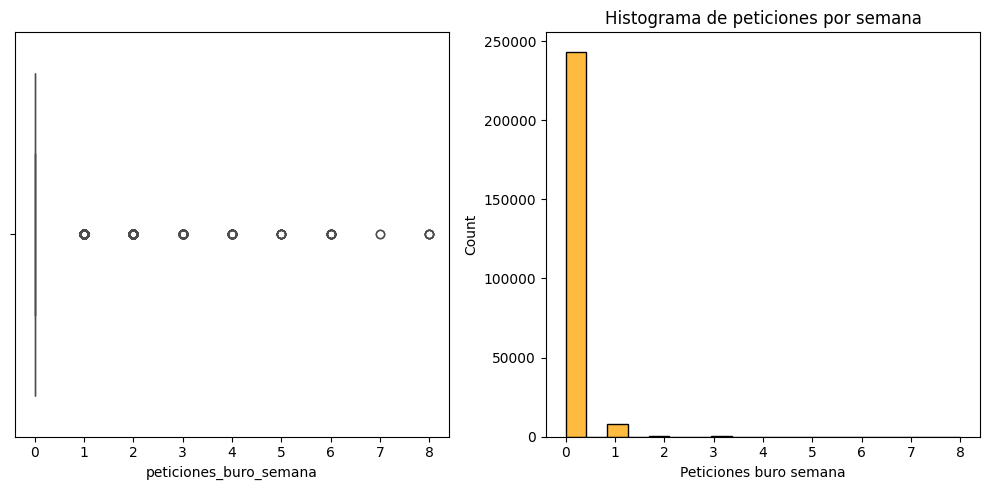

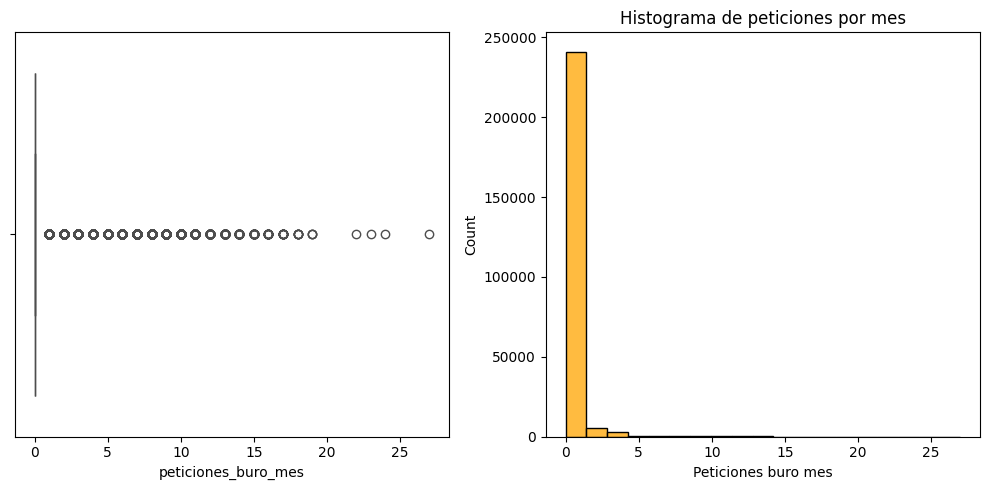

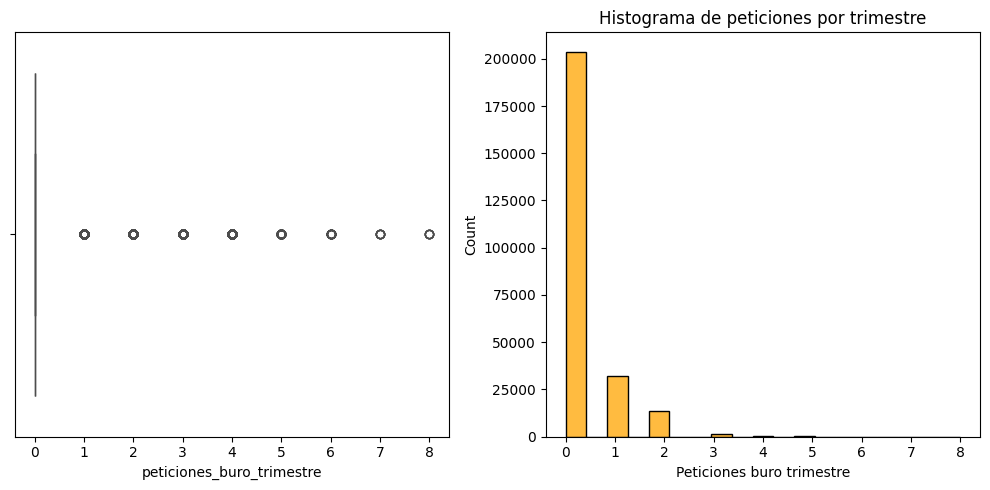

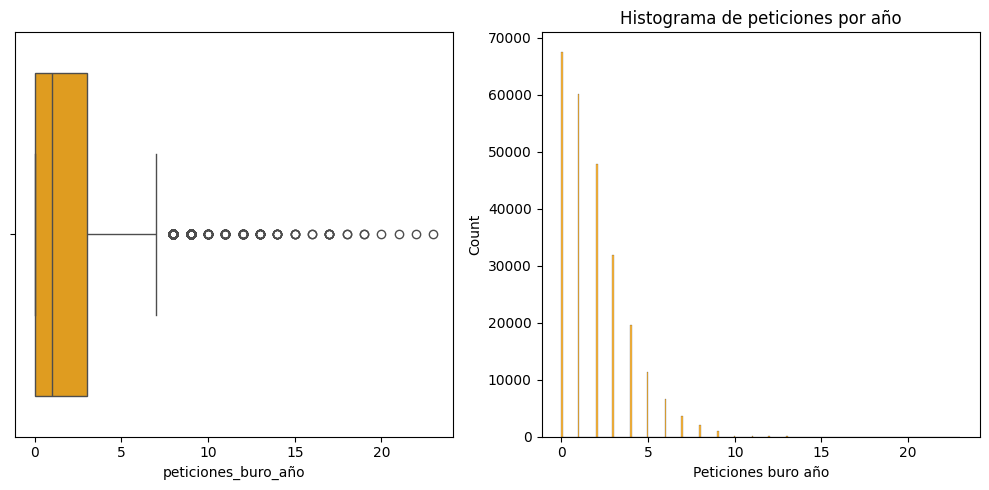

In [ ]:

peticiones = ['dia', 'semana', 'mes', 'trimestre', 'año']
for pet in peticiones:
    print(f"Media de peticiones por {pet} son {df['peticiones_buro_'+pet].mean()}")
    distribucion('peticiones_buro_'+pet)
    if i == 'año':
        print(f"cantidad de datos atipicos {len(df[df['peticiones_buro_'+pet] >7.5])}")
    else:
        print(f"cantidad de datos atipicos {len(df[df['peticiones_buro_'+pet] >0])}")


    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(x=f"peticiones_buro_{pet}",  data=df, color='orange',  ax=axs[0])
    plt.title(f"Boxplot de peticiones por {pet}")
    plt.xlabel(f"Peticiones buro {pet}")
    plt.tight_layout()


    sns.histplot(x=f"peticiones_buro_{pet}",  data=df, color='orange',  ax=axs[1])
    plt.title(f"Histograma de peticiones por {pet}")
    plt.xlabel(f"Peticiones buro {pet}")
    plt.tight_layout()







###Preprocesamiento
Separamos las variables numéricas, y categóricas para pre-procesarlas individualmente, en el caso de las numéricas, las dejamos tal cual, ya que revisando la distribución que tenían anteriormente, la mayoría son variables booleanas (1,0), y las que no tenían atípicos pero pocos, y considerando que vamos a usar un modelo basado en árboles de decisión como es XGBoost para clasificación, podríamos usarlas sin problema, puesto que es un modelo bastante robusto que controla bastante bien los valores atípicos, si quisiéramos ir un poco más allá podríamos implementar un log para estas variables y reducir su varianza.
En cuanto a categóricas les aplicamos ordinal encoder a las que tenían pocas clases para que el modelo las pudiera manejar de una buena manera, y a la variable tipo_empresa aplicamos un onehot-encoding en las clases más representativas, y luego unimos el dataset ya pre procesado y listo para entrenar y evaluar el modelo.

In [ ]:
df_num = df_pro.select_dtypes(include=['number'])
df_num
print(f"numero de columnas {len(df_num.columns)}")
df_num.columns

numero de columnas 25


Index(['mora', 'tiene_vehiculo', 'tiene_propiedades', 'numero_hijos',
       'ingreso_anual', 'monto_credito', 'proporciona_tel_trabajo',
       'proporciona_contacto_empresa', 'contesta_celular',
       'proporciona_tel_residencia', 'proporciona_email', 'puntaje_externo_1',
       'puntaje_externo_2', 'peticiones_buro_dia', 'peticiones_buro_semana',
       'peticiones_buro_mes', 'peticiones_buro_trimestre',
       'peticiones_buro_año', 'mes_bloqueo', 'año_solicitud', 'mes_solicitud',
       'id_oficina', 'id_empleado', 'edad años',
       'antiguedad_num_celular_meses'],
      dtype='object')

In [ ]:
df_cat = df_pro.select_dtypes(exclude=['number'])
df_cat = df_cat.drop(columns =['fecha_solicitud', 'tipo_empresa'])
print(f"numero de columnas {len(df_cat.columns)}")
df_cat.columns

numero de columnas 5


Index(['tipo_contrato', 'genero', 'tipo_ingreso', 'estado_civil',
       'ingreso_alto'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

names_cat = df_cat.columns

df_cat = encoder.fit_transform(df_cat)
df_cat = pd.DataFrame(df_cat, columns=names_cat).astype('int')

In [ ]:
#Haciendo uso de la funcion creada anteriormente

def resumen_columna(col):
    return df_cat[col].value_counts(normalize=False).to_frame('Número de registros')\
             .assign(Proporción=lambda x: (x['Número de registros'] / x['Número de registros'].sum() * 100).round(2))\
             .reset_index().rename(columns={'index': col})

for i in names_cat:
    print(i)
    print(resumen_columna(i))
    print('\n\n')

tipo_contrato
   tipo_contrato  Número de registros  Proporción
0              1               228313       90.74
1              0                23296        9.26



genero
   genero  Número de registros  Proporción
0       0               166754       66.28
1       1                84855       33.72



tipo_ingreso
   tipo_ingreso  Número de registros  Proporción
0             2               130153       51.73
1             4                57857       22.99
2             1                44840       17.82
3             0                18736        7.45
4             5                   14        0.01
5             6                    5        0.00
6             3                    4        0.00



estado_civil
   estado_civil  Número de registros  Proporción
0             2               163470       64.97
1             3                35304       14.03
2             0                23288        9.26
3             1                16471        6.55
4             5             

Como identificamos al principio que existen más de 58 tipos de empresas diferentes se decidió usar otro método diferente a ordinal encoder, ya que si lo usaramos se crearían 58 tipos diferentes de números lo cual no sería lo ideal; sin embargo, la otra alternativa era usar onehot-encoding, pero eran demasiadas columnas, a lo cual un método intermedio fue usar onehot-encoding, pero solo con una parte representativa de la variable tipo de empresa, las cuales son 17 tipos, que conforman el 87.91% y las otras las clasificamos como otras, u otro tipo.

In [ ]:
company_counts = df['tipo_empresa'].value_counts(normalize=True)
cumulative_counts = company_counts.cumsum()
threshold = 0.8791
top_companies = cumulative_counts[cumulative_counts <= threshold].index.tolist()

df['tipo_empresa_agrupado'] = df['tipo_empresa'].apply(lambda x: x if x in top_companies else 'other')

empresas = pd.get_dummies(df['tipo_empresa_agrupado'], prefix='tipo').astype('int')
empresas

,tipo_business type 1,tipo_business type 2,tipo_business type 3,tipo_construction,tipo_governmental,tipo_health,tipo_hosting,tipo_industry type 3,tipo_industry type 9,tipo_non-uni education,tipo_not specified,tipo_nursery school,tipo_other,tipo_security,tipo_self-employed,tipo_store type 3,tipo_store type 7,tipo_transport type 4
index,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251616,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
251617,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
251618,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_final = pd.concat([df_num, df_cat, empresas], axis = 1)
df_final = df_final.dropna()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251597 entries, 0 to 251608
Data columns (total 48 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   mora                          251597 non-null  float64
 1   tiene_vehiculo                251597 non-null  float64
 2   tiene_propiedades             251597 non-null  float64
 3   numero_hijos                  251597 non-null  float64
 4   ingreso_anual                 251597 non-null  float64
 5   monto_credito                 251597 non-null  float64
 6   proporciona_tel_trabajo       251597 non-null  float64
 7   proporciona_contacto_empresa  251597 non-null  float64
 8   contesta_celular              251597 non-null  float64
 9   proporciona_tel_residencia    251597 non-null  float64
 10  proporciona_email             251597 non-null  float64
 11  puntaje_externo_1             251597 non-null  float64
 12  puntaje_externo_2             251597 non-null  fl

###Separación o split de los datos

Se decidio usar un 70:20:10 en este caso 70% para entrenamiento del modelo, se uso un 20% para validación y ajustes finales y un 10% de los datos de evaluacion para evaluar el resultado final de las predicciones

In [ ]:
from sklearn.model_selection import train_test_split

x = df_final.drop('mora', axis=1)
y = df_final['mora']

X_train,X_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=9, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=1/3, random_state=9, stratify=y_test)

Se ejecuto el gridsearch para buscar y encontrar los mejores parametros que se ajusten al modelo y su precision

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV


# estimator = xgb.XGBClassifier(objective='binary:logistic')
# Params_grid = {
#     'n_estimators': [10, 20, 40],
#     'max_depth': [1,2,3,5],
#     'colsample_bytree':[0.7,1],
#     'eta':[0.01,0.1],
#     'subsample': [0.5, 0.8]
# }

# grid_cl = GridSearchCV(estimator = estimator, param_grid=Params_grid, scoring='roc_auc',verbose=1, cv=3)
# grid_cl.fit(X_train,y_train)

# best_model = grid_cl.best_estimator_

# print(f"\nMejores hiperparámetros encontrados: {grid_cl.best_params_}")
# print(f"Mejor puntaje de validación (usando '{grid_cl.scoring}'): {grid_cl.best_score_}")

Se creo el modelo con los mejores parametros probados en el gridsearch

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=1000,
    scale_pos_weight=10,
    early_stopping_rounds=10,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

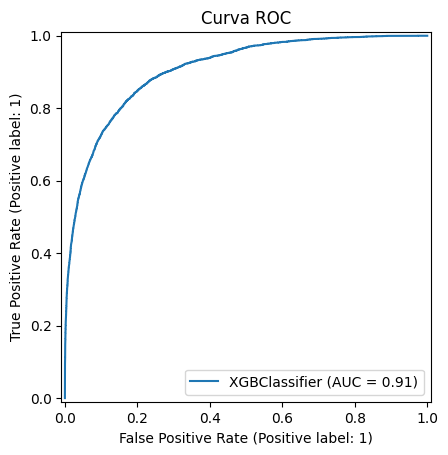

In [ ]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Curva ROC")
plt.show()

Aprovechandonos de la caracteristica de los arboles de decision podemos determinar la importancia de las caracteristicas para predecir si un cliente se encuentra en mora, entre las cuales encontramos monto_credito, ingreso_anual

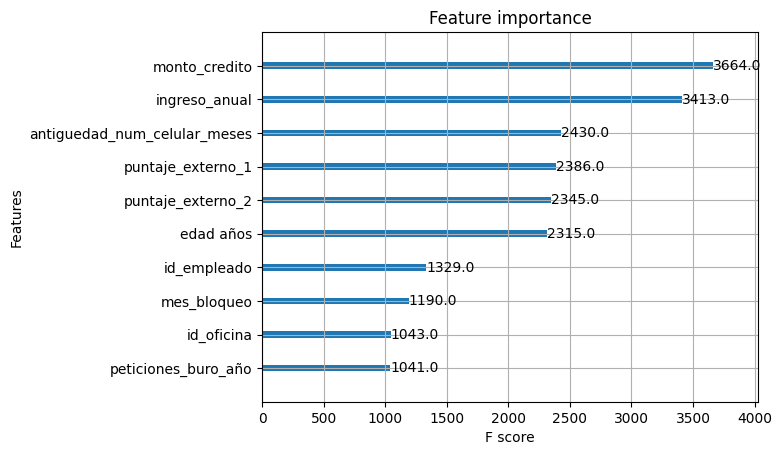

In [ ]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10)
plt.show()

Buscando que el modelo sea lo mas eficiente ejecutamos una grafica donde evaluamos la precision y el recall, donde nos enfocaremos mas en tener un mejor valor de recall ya que tener falsos negativos es costoso para la empresa y mas en la situacion actual en la que se encuentra, a lo cual preferiremos tener un mayor puntaje en esta metrica, para evitar falsos negativos

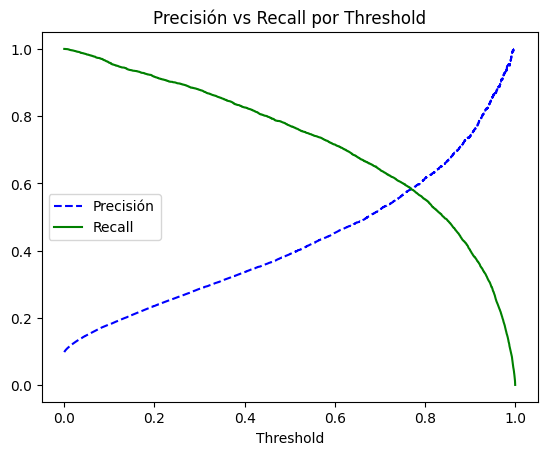

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], "b--",label="Precisión")
plt.plot(thresholds, recall[:-1], "g-",label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precisión vs Recall por Threshold")
plt.show()

#Evaluamos finalmente con el dataframe final

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report
)
tresh = 0.55
y_proba_test = model.predict_proba(X_val)[:, 1]
y_pred_test = (y_proba_test >= tresh).astype(int)


print(classification_report(y_val, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     22699
         1.0       0.42      0.75      0.54      2461

    accuracy                           0.87     25160
   macro avg       0.70      0.82      0.73     25160
weighted avg       0.92      0.87      0.89     25160




Matriz de Confusión:


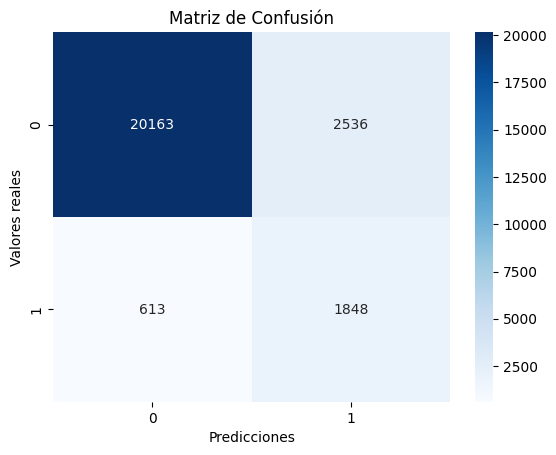

In [ ]:
# Matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_val, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Obtener la probabilidad de caer en mora (clase 1)
X_riesgo = X_val.copy()
X_riesgo['prob_mora'] = model.predict_proba(X_val)[:, 1]

# Convertir a porcentaje
X_riesgo['porc_riesgo'] = (X_riesgo['prob_mora'] * 100).round(2)


# Función para clasificar el nivel de riesgo
def clasificar_riesgo(prob):
    if prob >= 0.75:
        return 'Alto'
    elif prob >= 0.5:
        return 'Medio'
    else:
        return 'Bajo'

# Aplicar clasificación
X_riesgo['nivel_riesgo'] = X_riesgo['prob_mora'].apply(clasificar_riesgo)
X_riesgo[['porc_riesgo', 'nivel_riesgo']].head(10)

,porc_riesgo,nivel_riesgo
68404,98.650002,Alto
244997,48.040001,Bajo
35787,72.129997,Medio
188416,1.630000,Bajo
231329,0.240000,Bajo
181047,44.330002,Bajo
28262,13.380000,Bajo
148717,34.049999,Bajo
61159,0.270000,Bajo
220304,1.640000,Bajo


Se construyó un modelo de clasificación utilizando XGBoost con el objetivo de predecir si un cliente caerá en mora o no, con base en información disponible al momento de la solicitud de crédito. La problemática principal detectada por el banco era una alta tasa de morosidad cercana al 10%, dificultando el recaudo efectivo de cartera.

El modelo fue evaluado con una partición del 70% para entrenamiento, 20% para validación y 10% para comprobación, obteniendo los siguientes resultados sobre el conjunto final de prueba:

📈 Métricas Finales del Modelo
Accuracy (exactitud): 87%

Precision (clase mora): 42%

Recall (clase mora): 75%

F1-score (clase mora): 0.54

En general se logro un buen objetivo con un poco de sesgo pero teniendo en cuenta la necesidad del banco es aceptable, se puede mejorar un poco la parte del preprocesado y la seleccion de caracteristicas, pero en general se logro el objetivo, demostrando que con la analitica y ciencia de datos podemos identificar y resolver problematicas a problemas actuales muchas gracias